In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

from scipy.integrate import quad


import sys
sys.path.insert(1, '../../Files')

import logo
from constants import Units, Constants
from SNdistribution import SNdistribution

import SNprofiles
from DM4fermionINT import DmAcross


In [2]:
%load_ext autoreload
%autoreload 2

Check if everything is ok

In [3]:
logo.logo()


      ____  _   _   _____          _                 _\/_
     / ___|| \ | | |  ___|_ _  ___| |_ ___  _ __ _   _/\ 
     \___ \|  \| | | |_ / _` |/ __| __/ _ \| '__| | | |
      ___) | |\  | |  _| (_| | (__| || (_) | |  | |_| |
     |____/|_| \_| |_|  \__,_|\___|\__\___/|_|   \__, |
                                                 |___/ 
                                            
                Baking particles since 1987!
                         v.beta.1
    


# 1. SN Profiles

Let's use the same profiles as in:

Phys. Rev. D. 100, 075018 (2019) [1905.09284]  -  DeRocco, Graham, Kasen, Marques-Tavares, Rajendran

for which we have analytical profiles: density, temperature, electron fraction

## Load

In [4]:
# folder where the profiles are stored
dir_profiles = "../../ConfigFiles/SN-profiles/"

# profiles
rho_file = dir_profiles + "1MsolPNS-DeRocco/rho_DeRocco.dat"
Ye_file = dir_profiles + "1MsolPNS-DeRocco/Ye_DeRocco.dat"
T_file = dir_profiles + "1MsolPNS-DeRocco/T_DeRocco.dat"
lapse_file = dir_profiles + "1MsolPNS-DeRocco/lapse_DeRocco.dat"


#####################
# LOAD THE PROFILES #
#####################
# if use_saved_lapse=True uses the data in the "lapse_file", if False computes it and saves it in "lapse_file"

SN_prof = SNprofiles.SNprofiles_lightDM(rho_file, 
                                        Ye_file, 
                                        T_file, 
                                        use_saved_lapse=True, lapse_file=lapse_file)

## Plot the profiles

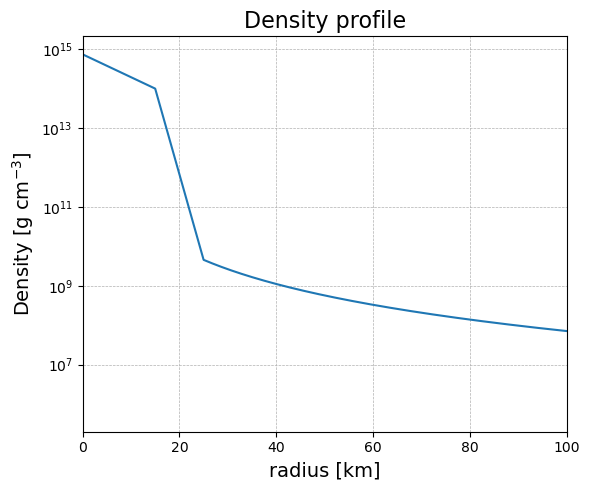

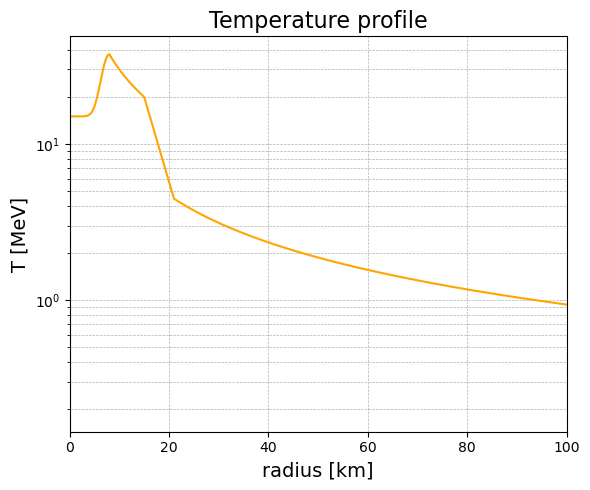

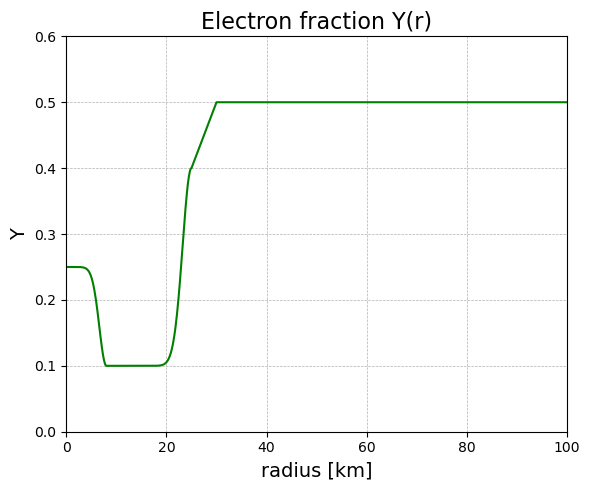

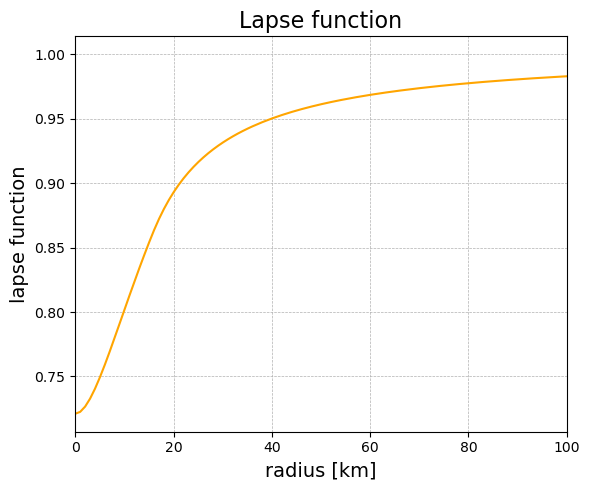

In [5]:
###################
# DENSITY PROFILE #
###################

rho_DATA = np.loadtxt(rho_file)

rad = rho_DATA[:,0]
rho_vals = rho_DATA[:,1]

# Plot
plt.figure(figsize=(6,5))
plt.plot(rad, rho_vals)
plt.xlim(0,100)
plt.yscale('log')
plt.xlabel("radius [km]", fontsize=14)
plt.ylabel(r"Density [g cm$^{-3}$]", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Density profile", fontsize=16)
plt.tight_layout()
plt.show()



#######################
# TEMPERATURE PROFILE #
#######################

T_DATA = np.loadtxt(T_file)

rad = T_DATA[:,0]
T_vals = T_DATA[:,1]

# Plot
plt.figure(figsize=(6,5))
plt.plot(rad, T_vals, color='orange')
plt.yscale('log')
plt.xlim(0,100)
plt.xlabel("radius [km]", fontsize=14)
plt.ylabel("T [MeV]", fontsize=14)
plt.title("Temperature profile", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()




#############################
# ELECTRON FRACTION PROFILE #
#############################

Ye_DATA = np.loadtxt(Ye_file)

rad = Ye_DATA[:,0]
Ye_vals = Ye_DATA[:,1]

# Plot
plt.figure(figsize=(6,5))
plt.plot(rad, Ye_vals, color='green')
plt.xlim(0,100)
plt.ylim(0, 0.6)
plt.xlabel("radius [km]", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Electron fraction Y(r)", fontsize=16)
plt.tight_layout()
plt.show()




##################
# LAPSE FUNCTION #
##################

lapse_DATA = np.loadtxt(lapse_file)

rad = lapse_DATA[:,0]
lapse_vals = lapse_DATA[:,1]

# Plot
plt.figure(figsize=(6,5))
plt.plot(rad, lapse_vals, color='orange')
plt.xlim(0,100)
plt.xlabel("radius [km]", fontsize=14)
plt.ylabel("lapse function", fontsize=14)
plt.title("Lapse function", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# 2 SET UP

In [6]:
SNdist = SNdistribution(SNrate=1.63, 
                        Rd=2.6, 
                        H=0.3, 
                        RE=8.23, 
                        zE=0.0208)

## Diffuse approximation

In [7]:
# FLUX

diffSNfactor = SNdist.flux_factor()
print("diffuse galactic SN flux factor: ", diffSNfactor, " [cm^{-2} s^{-1}]")

diffuse galactic SN flux factor:  1.3955222568980171e-55  [cm^{-2} s^{-1}]


In [8]:
# FLUENCE
texp_LZ = 1000 / 365 # 1000 days (15ton yr)  https://arxiv.org/pdf/2102.11740
ExpTIME = texp_LZ * Units.seconds_in_year  # Time window of the experiment, in seconds

fluence_diff = diffSNfactor * ExpTIME # [cm^{-2}]
print(f'Diffuse fluence factor (for 2.74 yr exposure): {fluence_diff:.3e} cm^-2')

Diffuse fluence factor (for 2.74 yr exposure): 1.206e-47 cm^-2


# 3. Dark fermion

## 3.1 using the diffuse galactic SN flux approximation

Here we are going to compute the expected signal in a direct detection experiment (XENON1T)

First using the diffuse galactic SN flux approximation.

----------------------

For that you have class $\bf{DmAcross}$ defined in the imported module $\bf{DM4fermionINT}$

Inputs:
- Z: atomic number of the target material
- mA: mass number of the target material
- diffSNfactor: diffuse galactic SN factor [cm^{-2} s^{-1}]
- profile: the SN profile class

In [9]:
# TARGET: Xenon
Z_Xe = 54
mA_Xe = 131.293*931.5 # MeV


DMfermion = DmAcross( Z=Z_Xe, mA=mA_Xe, diffSNfactor=diffSNfactor, profile=SN_prof )

### DM flux (with/without gravitational effects)

For that you have function $\bf{diffFlux}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p      : momentum of the incoming DM particle [MeV]
- rad    : radius [km]
- Nchi   : number flux of DM from a SN
        
Returns:
- dflux/dp  [m^-2 s^-1 MeV^-1]

--------------------------------

To take into account the gravitational effects you have function $\bf{Fp0}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p_inf  : momentum of the incoming DM particle when it has already scaped the SN gravitational potential [MeV]
- rad    : radius [km]
        
Returns:
- Momentoum at origen (p0) given p_inf, mchi and rad [MeV]

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)


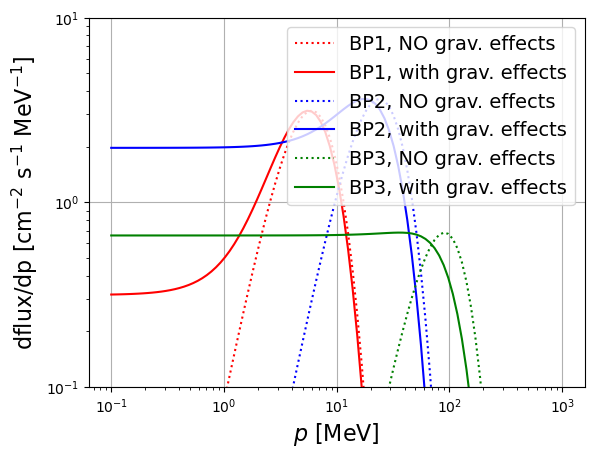

In [10]:
# LET's PLOT THE FLUX ON EARTH

mchiTEST1 = 6 # MeV
mchiTEST2 = 26 # MeV
mchiTEST3 = 132 # MeV

Nchi1 = 7.3e55 * np.log(10) # number flux of DM from the SN
Nchi2 = 3.3e56 * np.log(10) # number flux of DM from the SN
Nchi3 = 2.2e56 * np.log(10) # number flux of DM from the SN

rE1 = 55.7 # km
rE2 = 19.6 # km
rE3 = 15.2 # km

print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')



p_grid = np.logspace(-1, 3, 100)


diffFlux_plot_BP1_noG = [ DMfermion.diffFlux(mchiTEST1, pp, rad=rE1, Nchi=Nchi1) for pp in p_grid ]
diffFlux_plot_BP1 = [ DMfermion.diffFlux(mchiTEST1, DMfermion.Fp0(pp, mchiTEST1, rad =rE1), rad=rE1, Nchi=Nchi1) for pp in p_grid ]

diffFlux_plot_BP2_noG = [ DMfermion.diffFlux(mchiTEST2, pp, rad=rE2, Nchi=Nchi2) for pp in p_grid ]
diffFlux_plot_BP2 = [ DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(pp, mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2) for pp in p_grid ]

diffFlux_plot_BP3_noG = [ DMfermion.diffFlux(mchiTEST3, pp, rad=rE3, Nchi=Nchi3) for pp in p_grid ]
diffFlux_plot_BP3 = [ DMfermion.diffFlux(mchiTEST3, DMfermion.Fp0(pp, mchiTEST3, rad =rE3), rad=rE3, Nchi=Nchi3) for pp in p_grid ]



plt.plot(p_grid, diffFlux_plot_BP1_noG, ':', color='red', label=fr'BP1, NO grav. effects')
plt.plot(p_grid, diffFlux_plot_BP1, '-', color='red', label=fr'BP1, with grav. effects')

plt.plot(p_grid, diffFlux_plot_BP2_noG, ':', color='blue', label=fr'BP2, NO grav. effects')
plt.plot(p_grid, diffFlux_plot_BP2, '-', color='blue', label=fr'BP2, with grav. effects')

plt.plot(p_grid, diffFlux_plot_BP3_noG, ':', color='green', label=fr'BP3, NO grav. effects')
plt.plot(p_grid, diffFlux_plot_BP3, '-', color='green', label=fr'BP3, with grav. effects')

# plt.ylim(1e5,2e13)
plt.ylim(1e-1,1e1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$p$ [MeV]", fontsize=16)
plt.ylabel(r"dflux/dp [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]", fontsize=16)
plt.legend(fontsize=14)
plt.grid()
plt.show()

### DM-target cross-section

For that you have function $\bf{dsigmadErec}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p      : momentum of the incoming DM particle [MeV]
- Erec   : recoil energy of the target nucleus [MeV]
- y_coup : coupling (dimensionless)

Returns:
- dσ/dE_rec [m^2 / MeV]

y =  5.011872336272715e-16

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56


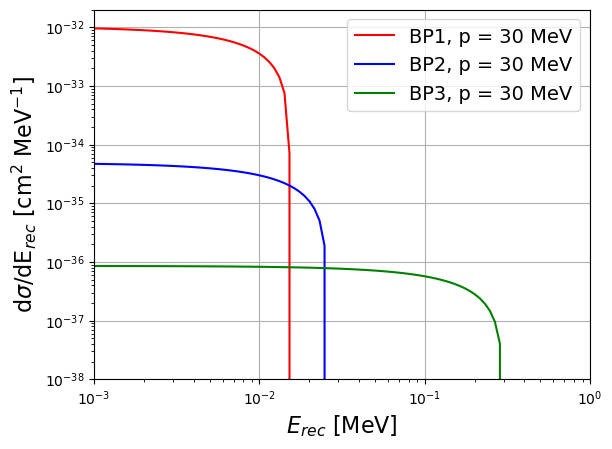

In [11]:
# LET's TEST THE CROSS SECTION

pTEST = 30 # MeV
y_coupTEST = 10**(-15.3)

print('y = ', y_coupTEST)
print('')
print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')


Erec_grid = np.logspace(-3, -0, 100)


dsdErec_plot_BP1 = [ DMfermion.dsigmadErec(mchiTEST1, pTEST, ee, y_coupTEST) for ee in Erec_grid ]
dsdErec_plot_BP2 = [ DMfermion.dsigmadErec(mchiTEST2, pTEST, ee, y_coupTEST) for ee in Erec_grid ]
dsdErec_plot_BP3 = [ DMfermion.dsigmadErec(mchiTEST3, pTEST, ee, y_coupTEST) for ee in Erec_grid ]


plt.plot(Erec_grid, dsdErec_plot_BP1, color='red', label=fr'BP1, p = {pTEST} MeV')
plt.plot(Erec_grid, dsdErec_plot_BP2, color='blue', label=fr'BP2, p = {pTEST} MeV')
plt.plot(Erec_grid, dsdErec_plot_BP3, color='green', label=fr'BP3, p = {pTEST} MeV')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3,1)
plt.ylim(1e-38,2e-32)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"d$\sigma$/dE$_{rec}$ [cm$^2$ MeV$^{-1}$]", fontsize=16)
# plt.title("", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

### Recoil spectra (signal)

For that you have function $\bf{dspectra}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- Erec   : target recoil energy [MeV]
- y_coup : DM-proton coupling
- rad    : radius [km]
- Nchi   : number flux of DM from a SN
        
Returns:
- recoil spectra in [MeV^-1 s^-1 ton^-1]

In [12]:
# LZ energy region > 50% efficiency https://arxiv.org/pdf/2410.17036
Erecmin_LZ = 0.0054 # MeV
Erecmax_LZ = 0.055 # MeV

Mtarget_LZ = 5475 # kg
texp_LZ = 1000 / 365 # 1000 days (15ton yr)  https://arxiv.org/pdf/2102.11740

y =  5.011872336272715e-16

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56


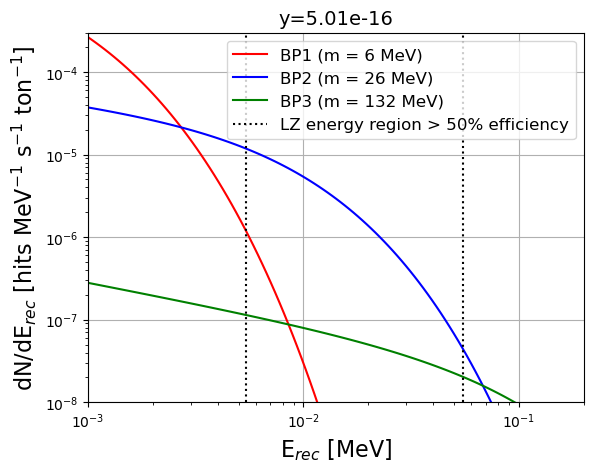

In [13]:
# LET's PLOT THE TARGET RECOIL SPECTRA

print('y = ', y_coupTEST)
print('')
print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')


Erec_grid = np.logspace(-3, -1, 100)


dspectra_plot_BP1 = [ DMfermion.dspectra(mchiTEST1, ee, y_coupTEST, rad=rE1, Nchi=Nchi1) for ee in Erec_grid ]
dspectra_plot_BP2 = [ DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]
dspectra_plot_BP3 = [ DMfermion.dspectra(mchiTEST3, ee, y_coupTEST, rad=rE3, Nchi=Nchi3) for ee in Erec_grid ]


plt.plot(Erec_grid, dspectra_plot_BP1, color='red', label=fr'BP1 (m = {mchiTEST1} MeV)')
plt.plot(Erec_grid, dspectra_plot_BP2, color='blue', label=fr'BP2 (m = {mchiTEST2} MeV)')
plt.plot(Erec_grid, dspectra_plot_BP3, color='green', label=fr'BP3 (m = {mchiTEST3} MeV)')
plt.axvline(x=Erecmin_LZ, linestyle=':', color='black', label='LZ energy region > 50% efficiency')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3,2e-1)
plt.ylim(1e-8,3e-4)
plt.xlabel("E$_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"dN/dE$_{rec}$ [hits MeV$^{-1}$ s$^{-1}$ ton$^{-1}$]", fontsize=16)
plt.title(fr"y={y_coupTEST:0.2e}", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

### Expected number of signal events

For that you have function $\bf{spectra}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi    : DM mass [MeV]
- y_coup  : DM-proton coupling
- rad     : radius [km]
- Nchi    : number flux of DM from a SN
- Mtarget : target mass [kg]
- Texp    : exposure time [s]
- Emin    : minimum recoil energy of the experiment [MeV]
- Emax    : maximum recoil energy of the experiment [MeV]

mchi, y_coup, rad, Nchi, Mtarget, Texp, Emin, Emax
        
Returns:
- Total number of recoil events

In [14]:
print('y = ', y_coupTEST)
print('')
print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')


N1 = DMfermion.spectra(mchiTEST1, y_coupTEST, rE1, Nchi1, Mtarget_LZ, texp_LZ*(365*24*60*60), Erecmin_LZ, Erecmax_LZ)
N2 = DMfermion.spectra(mchiTEST2, y_coupTEST, rE2, Nchi2, Mtarget_LZ, texp_LZ*(365*24*60*60), Erecmin_LZ, Erecmax_LZ)
N3 = DMfermion.spectra(mchiTEST3, y_coupTEST, rE3, Nchi3, Mtarget_LZ, texp_LZ*(365*24*60*60), Erecmin_LZ, Erecmax_LZ)


print('\n Expected number of events for exposure 15 ton yr')
print(fr'  BP1 ---> {N1:.3f} events')
print(fr'  BP2 ---> {N2:.3f} events')
print(fr'  BP3 ---> {N3:.3f} events')

y =  5.011872336272715e-16

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56

 Expected number of events for exposure 15 ton yr
  BP1 ---> 0.662 events
  BP2 ---> 36.837 events
  BP3 ---> 1.020 events


# 3.2 GRID of the expected number of signal events

##### Data

Phys. Rev. D. 100, 075018 (2019) [1905.09284]  -  DeRocco, Graham, Kasen, Marques-Tavares, Rajendran

In [15]:
massesIT = [5, 6, 8, 9, 11, 14, 17, 21, 26, 32, 39, 48, 58, 88, 108, 132, 162, 199, 244, 300]

log10yIT = [-13.3, -13.7, -14, -14.3, -14.7, -15, -15.3, -15.7, -16, -16.3, -16.7, -17, -17.3, 
    -17.7, -18, -18.3, -18.7, -19, -19.3, -19.7, -20, -20.3, -20.7, -21, -21.3, -21.7, -22 ]

In [16]:
numfluxIT = [[2.3e52, 2.9e52, 5.9e52, 4.0e52, 6.2e52, 1.0e53, 9.6e52, 1.4e53, 1.5e53, 1.7e53, 1.2e53, 2.7e53, 2.0e53, 5.1e53, 2.1e53, 2.3e53, 3.0e53, 2.0e53, 7.1e52, 5.1e52], 
             [1.0e53, 1.7e53, 2.1e53, 2.1e53, 2.7e53, 4.0e53, 4.5e53, 5.5e53, 5.5e53, 3.8e53, 1.6e54, 1.0e54, 1.4e54, 1.3e54, 1.0e54, 9.9e53, 9.5e53, 5.6e53, 2.7e53, 3.4e53], 
             [5.0e53, 4.6e53, 6.6e53, 8.9e53, 1.1e54, 1.1e54, 2.2e54, 2.1e54, 2.3e54, 5.3e54, 6.6e54, 4.1e54, 7.8e54, 3.7e54, 4.8e54, 4.7e54, 3.2e54, 1.3e54, 1.0e54, 1.8e54], 
             [2.3e54, 2.5e54, 2.9e54, 4.0e54, 3.4e54, 4.3e54, 7.0e54, 7.3e54, 1.7e55, 1.1e55, 1.7e55, 3.9e55, 2.3e55, 1.8e55, 1.9e55, 1.4e55, 6.9e54, 5.3e54, 6.7e54, 4.4e54], 
             [8.9e54, 1.1e55, 9.7e54, 1.2e55, 1.4e55, 2.6e55, 2.3e55, 1.7e55, 4.6e55, 6.5e55, 5.8e55, 3.9e55, 4.6e55, 6.2e55, 5.3e55, 3.4e55, 1.8e55, 1.9e55, 2.3e55, 4.6e54], 
             [2.4e55, 2.7e55, 3.6e55, 3.8e55, 5.3e55, 6.4e55, 8.0e55, 1.1e56, 1.1e56, 1.1e56, 1.4e56, 2.1e56, 1.4e56, 1.6e56, 1.3e56, 8.6e55, 7.5e55, 8.7e55, 3.3e55, 2.5e54], 
             [5.8e55, 7.3e55, 7.6e55, 1.0e56, 1.2e56, 1.5e56, 2.0e56, 2.6e56, 3.3e56, 4.2e56, 4.6e56, 3.7e56, 4.7e56, 3.9e56, 2.7e56, 2.2e56, 2.7e56, 1.5e56, 2.2e55, 1.2e54], 
             [1.2e56, 1.2e56, 1.5e56, 1.7e56, 1.8e56, 2.0e56, 3.2e56, 4.7e56, 6.1e56, 6.8e56, 8.4e56, 9.5e56, 1.0e57, 6.9e56, 6.5e56, 6.6e56, 4.7e56, 1.1e56, 1.0e55, 5.4e53], 
             [1.7e56, 2.0e56, 2.3e56, 2.4e56, 2.9e56, 4.8e56, 5.5e56, 9.4e56, 1.2e57, 1.4e57, 1.6e57, 1.6e57, 1.7e57, 1.6e57, 1.5e57, 1.2e57, 3.7e56, 5.4e55, 4.8e54, 2.5e53], 
             [3.1e56, 2.7e56, 3.4e56, 3.9e56, 5.3e56, 7.4e56, 1.2e57, 1.3e57, 1.8e57, 2.3e57, 2.4e57, 2.7e57, 2.8e57, 3.0e57, 2.3e57, 8.5e56, 1.8e56, 2.5e55, 2.2e54, 1.2e53], 
             [3.5e56, 4.2e56, 5.6e56, 6.5e56, 7.7e56, 1.5e57, 1.9e57, 2.3e57, 2.9e57, 3.2e57, 3.6e57, 4.1e57, 4.6e57, 3.7e57, 1.5e57, 4.2e56, 8.4e55, 1.2e55, 1.0e54, 5.4e52], 
             [5.6e56, 6.9e56, 9.4e56, 1.3e57, 1.6e57, 2.0e57, 2.8e57, 3.3e57, 4.0e57, 4.6e57, 5.3e57, 6.1e57, 6.8e57, 2.3e57, 7.5e56, 2.0e56, 3.9e55, 5.4e54, 4.8e53, 2.5e52], 
             [8.3e56, 1.2e57, 1.5e57, 2.0e57, 2.3e57, 3.4e57, 3.9e57, 4.2e57, 4.8e57, 6.7e57, 8.0e57, 8.8e57, 6.4e57, 1.1e57, 3.5e56, 9.1e55, 1.8e55, 2.5e54, 2.2e53, 1.2e52], 
             [1.3e57, 1.9e57, 2.7e57, 3.1e57, 3.7e57, 4.4e57, 5.1e57, 5.4e57, 6.7e57, 9.7e57, 1.1e58, 7.4e57, 3.4e57, 5.1e56, 1.6e56, 4.2e55, 8.4e54, 1.2e54, 1.0e53, 5.4e51], 
             [1.8e57, 2.7e57, 3.4e57, 4.3e57, 5.0e57, 5.6e57, 6.5e57, 7.5e57, 1.1e58, 1.2e58, 8.2e57, 3.8e57, 1.6e57, 2.4e56, 7.5e55, 2.0e55, 3.9e54, 5.4e53, 4.8e52, 2.5e51], 
             [2.4e57, 3.2e57, 4.5e57, 5.5e57, 6.3e57, 7.8e57, 8.5e57, 1.2e58, 1.3e58, 8.9e57, 4.1e57, 1.8e57, 7.4e56, 1.1e56, 3.5e55, 9.1e54, 1.8e54, 2.5e53, 2.2e52, 1.2e51], 
             [3.4e57, 4.3e57, 5.5e57, 6.6e57, 8.5e57, 9.9e57, 1.3e58, 1.5e58, 9.5e57, 4.4e57, 1.9e57, 8.2e56, 3.4e56, 5.1e55, 1.6e55, 4.2e54, 8.4e53, 1.2e53, 1.0e52, 5.4e50], 
             [4.4e57, 5.5e57, 6.6e57, 7.8e57, 1.1e58, 1.4e58, 1.6e58, 1.0e58, 4.6e57, 2.0e57, 8.9e56, 3.8e56, 1.6e56, 2.4e55, 7.5e54, 2.0e54, 3.9e53, 5.4e52, 4.8e51, 2.5e50], 
             [5.6e57, 6.6e57, 7.7e57, 1.0e58, 1.4e58, 1.6e58, 1.0e58, 4.9e57, 2.1e57, 9.4e56, 4.1e56, 1.8e56, 7.4e55, 1.1e55, 3.5e54, 9.1e53, 1.8e53, 2.5e52, 2.2e51, 1.2e50], 
             [6.6e57, 7.4e57, 9.4e57, 1.5e58, 1.7e58, 1.1e58, 5.1e57, 2.3e57, 1.0e57, 4.4e56, 1.9e56, 8.2e55, 3.4e55, 5.1e54, 1.6e54, 4.2e53, 8.4e52, 1.2e52, 1.0e51, 5.4e49], 
             [8.4e57, 1.0e58, 1.5e58, 1.7e58, 1.1e58, 5.4e57, 2.4e57, 1.1e57, 4.6e56, 2.0e56, 8.9e55, 3.8e55, 1.6e55, 2.4e54, 7.5e53, 2.0e53, 3.9e52, 5.4e51, 4.8e50, 2.5e49], 
             [1.1e58, 1.5e58, 1.8e58, 1.2e58, 5.6e57, 2.5e57, 1.1e57, 4.9e56, 2.1e56, 9.4e55, 4.1e55, 1.8e55, 7.4e54, 1.1e54, 3.5e53, 9.1e52, 1.8e52, 2.5e51, 2.2e50, 1.2e49], 
             [1.5e58, 1.8e58, 1.3e58, 5.9e57, 2.6e57, 1.2e57, 5.1e56, 2.3e56, 1.0e56, 4.4e55, 1.9e55, 8.2e54, 3.4e54, 5.1e53, 1.6e53, 4.2e52, 8.4e51, 1.2e51, 1.0e50, 5.4e48], 
             [1.8e58, 1.3e58, 6.2e57, 2.7e57, 1.2e57, 5.4e56, 2.4e56, 1.1e56, 4.6e55, 2.0e55, 8.9e54, 3.8e54, 1.6e54, 2.4e53, 7.5e52, 2.0e52, 3.9e51, 5.4e50, 4.8e49, 2.5e48], 
             [1.4e58, 6.5e57, 2.9e57, 1.3e57, 5.6e56, 2.5e56, 1.1e56, 4.9e55, 2.1e55, 9.4e54, 4.1e54, 1.8e54, 7.4e53, 1.1e53, 3.5e52, 9.1e51, 1.8e51, 2.5e50, 2.2e49, 1.2e48], 
             [6.8e57, 3.0e57, 1.3e57, 5.9e56, 2.6e56, 1.2e56, 5.1e55, 2.3e55, 1.0e55, 4.4e54, 1.9e54, 8.2e53, 3.4e53, 5.1e52, 1.6e52, 4.2e51, 8.4e50, 1.2e50, 1.0e49, 5.4e47], 
             [3.2e57, 1.4e57, 6.2e56, 2.7e56, 1.2e56, 5.4e55, 2.4e55, 1.1e55, 4.6e54, 2.0e54, 8.9e53, 3.8e53, 1.6e53, 2.4e52, 7.5e51, 2.0e51, 3.9e50, 5.4e49, 4.8e48, 2.5e47]
            ]


In [17]:
energysphereIT = [
    [300.0, 248.0, 203.0, 167.0, 136.0, 111.0, 89.8, 72.8, 59.3, 48.2, 31.9, 25.7, 22.4, 20.8, 19.8, 19.2, 18.6, 18.0, 17.5, 16.9],
    [233.0, 192.0, 156.0, 127.0, 104.0, 84.4, 69.0, 55.9, 45.5, 37.1, 24.3, 21.9, 20.5, 19.7, 19.0, 18.4, 17.9, 17.3, 16.8, 16.3],
    [181.0, 148.0, 121.0, 98.5, 80.1, 65.1, 53.0, 43.1, 35.1, 28.6, 21.5, 20.3, 19.5, 18.8, 18.3, 17.7, 17.2, 16.7, 16.2, 15.7],
    [141.0, 114.0, 93.6, 76.2, 62.2, 50.6, 41.2, 33.6, 27.2, 22.9, 20.0, 19.3, 18.7, 18.1, 17.6, 17.1, 16.6, 16.1, 15.5, 15.0],
    [110.0, 89.3, 72.8, 59.5, 48.4, 39.5, 32.1, 26.1, 22.4, 20.8, 19.2, 18.6, 18.0, 17.5, 17.0, 16.5, 16.0, 15.4, 14.9, 14.2],
    [86.1, 70.4, 57.4, 46.7, 38.0, 31.0, 25.1, 22.1, 20.6, 19.7, 18.5, 17.9, 17.4, 16.9, 16.4, 15.9, 15.3, 14.8, 14.0, 12.8],
    [68.0, 55.7, 45.3, 36.9, 30.1, 24.4, 21.8, 20.4, 19.6, 18.9, 17.8, 17.3, 16.8, 16.3, 15.8, 15.2, 14.7, 13.8, 12.5, 10.7],
    [54.2, 44.2, 36.1, 29.3, 23.9, 21.6, 20.3, 19.5, 18.9, 18.3, 17.2, 16.7, 16.2, 15.7, 15.2, 14.6, 13.7, 12.2, 10.3, "Bulk"],
    [43.4, 35.4, 28.9, 23.6, 21.4, 20.2, 19.4, 18.8, 18.2, 17.7, 16.6, 16.1, 15.6, 15.1, 14.5, 13.4, 11.9, "Bulk", "Bulk", "Bulk"],
    [34.9, 28.4, 23.4, 21.3, 20.1, 19.3, 18.7, 18.1, 17.6, 17.1, 16.0, 15.5, 15.0, 14.4, 13.3, 11.7, "Bulk", "Bulk", "Bulk", "Bulk"],
    [28.1, 23.2, 21.1, 20.0, 19.3, 18.7, 18.1, 17.6, 17.0, 16.5, 15.5, 14.9, 14.2, 13.1, 11.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [23.2, 21.1, 20.0, 19.2, 18.6, 18.1, 17.5, 17.0, 16.5, 15.9, 14.9, 14.1, 12.9, 11.1, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [21.0, 19.9, 19.2, 18.6, 18.0, 17.5, 16.9, 16.4, 15.9, 15.4, 14.0, 12.7, 11.0, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [19.9, 19.2, 18.6, 18.0, 17.5, 16.9, 16.4, 15.9, 15.3, 14.8, 12.6, 10.8, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [19.2, 18.6, 18.0, 17.4, 16.9, 16.4, 15.8, 15.3, 14.8, 13.9, 10.6, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [18.6, 18.0, 17.4, 16.9, 16.4, 15.8, 15.3, 14.7, 13.8, 12.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [18.0, 17.4, 16.9, 16.4, 15.8, 15.3, 14.7, 13.8, 12.4, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [17.4, 16.9, 16.4, 15.8, 15.3, 14.7, 13.8, 12.3, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [16.9, 16.4, 15.8, 15.3, 14.7, 13.8, 12.3, 10.3, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [16.4, 15.8, 15.3, 14.7, 13.8, 12.3, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [15.9, 15.3, 14.8, 13.8, 12.4, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [15.3, 14.8, 13.9, 12.4, 10.4, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [14.8, 13.9, 12.4, 10.5, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [14.0, 12.5, 10.6, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [12.6, 10.7, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    [10.8, "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"],
    ["Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk", "Bulk"]
]


##### check

In [18]:
LZ_back = 6.18  # https://arxiv.org/pdf/1802.06039, pag 9, table III
LZ_signal_128 = 1.28*(LZ_back**0.5) # 90 % C.L.
LZ_signal_164 = 1.64*(LZ_back**0.5) # 95 % C.L.
LZ_signal_196 = 1.96*(LZ_back**0.5) # 97.5% C.L

print('Expected background events in LZ 15ton yr:    B = ', LZ_back)

print('\n Number of hits to get a value of Z=S/sqrt(B): ')
print(fr'   N_events = {LZ_signal_128:.3f}       for 90% C.L.,   Z = ', 1.28 )
print(fr'   N_events = {LZ_signal_164:.3f}       for 95% C.L.,   Z = ', 1.64 )
print(fr'   N_events = {LZ_signal_196:.3f}       for 97.5% C.L., Z = ', 1.96 )

print(' ------- ')
print(' Considering a BACKGROUND FREE experiment: ')
print('   N_events = 2.302       for 90% C.L.')
print('   N_events = 2.996       for 90% C.L.')
print('   N_events = 3.87        for 90% C.L.')
      


# XENON1T https://arxiv.org/pdf/1805.12562
XENON1T_back = 7.36
XENON1T_signal_128 = 1.28*(XENON1T_back**0.5)
XENON1T_signal_164 = 1.64*(XENON1T_back**0.5)
XENON1T_signal_196 = 1.96*(XENON1T_back**0.5)

Expected background events in LZ 15ton yr:    B =  6.18

 Number of hits to get a value of Z=S/sqrt(B): 
   N_events = 3.182       for 90% C.L.,   Z =  1.28
   N_events = 4.077       for 95% C.L.,   Z =  1.64
   N_events = 4.872       for 97.5% C.L., Z =  1.96
 ------- 
 Considering a BACKGROUND FREE experiment: 
   N_events = 2.302       for 90% C.L.
   N_events = 2.996       for 90% C.L.
   N_events = 3.87        for 90% C.L.


m =  8  MeV
log10(y_coup) =  -16.0
r_energy sphere =  28.9  km
Number flux * log(10) =  5.295945713886306e+56


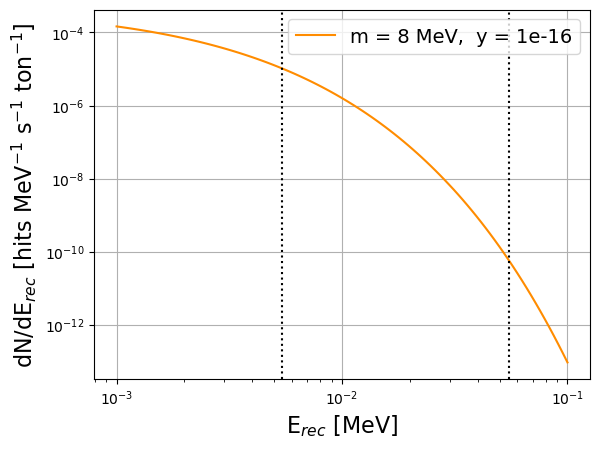


 Expected number of signal events:  12.278954806171937
 Z =  4.939319999776919


In [19]:
m_it = 2 # index
y_it = 8 # index

m_ev = massesIT[m_it]
y_ev = 10**(log10yIT[y_it])

print("m = ", m_ev, " MeV")
print("log10(y_coup) = ", np.log10(y_ev))

r_ev = energysphereIT[y_it][m_it]
N_ev = numfluxIT[y_it][m_it] * np.log(10)

print("r_energy sphere = ", r_ev, " km")
print("Number flux * log(10) = ", N_ev)



Mtarget = Mtarget_LZ # kg
texp = texp_LZ # years

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV



# diff spectra
Erec_grid = np.logspace(-3, -1, 100)

dspectra_plot1 = [ DMfermion.dspectra(m_ev, ee, y_ev, r_ev, N_ev) for ee in Erec_grid ]

plt.plot(Erec_grid, dspectra_plot1, color='darkorange', label=fr'm = {m_ev} MeV,  y = {y_ev}')
plt.axvline(x=Emin, linestyle=':', color='black')
plt.axvline(x=Emax, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("E$_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"dN/dE$_{rec}$ [hits MeV$^{-1}$ s$^{-1}$ ton$^{-1}$]", fontsize=16)
plt.legend(fontsize=14)
plt.grid()
plt.show()


# number of signal events
HITS = DMfermion.spectra(m_ev, 
                  y_ev, 
                  r_ev, 
                  N_ev, 
                  Mtarget, 
                  texp * Units.seconds_in_year, 
                  Emin, 
                  Emax)

print('\n Expected number of signal events: ', HITS)
print(' Z = ', HITS / (LZ_back**0.5))

### Compute the expected signal for each grid point (takes some time and is already saved)

#### 1. Diffuse approximation (TAKES TIME already saved below)

In [ ]:
# FOR LZ, with 15 ton yr exposure

Mtarget = Mtarget_LZ # kg
texp = texp_LZ # years

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV



# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape


# grid and save
with open("data/Nhits_grid_LZ15tonyr.dat", "w") as f:
    # header
    f.write("# log10(y)    mass[MeV]    Nhits\n")
    
    for y_it in range(len(log10yIT)):
        for m_it in range(len(massesIT)):
            m_ev = massesIT[m_it]
            y_ev = 10**(log10yIT[y_it])
            r_ev = energysphereIT[y_it][m_it]

            # If r_ev is "Bulk", skip and set result to 0
            if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                Nhits[y_it, m_it] = 0
                f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                continue

            N_ev = numfluxIT[y_it][m_it] * np.log(10)

            result = DMfermion.spectra(
                m_ev,
                y_ev,
                r_ev,
                N_ev,
                Mtarget,
                texp * Units.seconds_in_year,
                Emin,
                Emax
            )

            Nhits[y_it, m_it] = result

            f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.3f}  {result:.6e}\n")

print('DONE')

###  LOAD

#### Diffuse approximation

In [20]:
################
# LZ 15 ton yr #
################

# LOAD
data = np.loadtxt("data/Nhits_grid_LZ15tonyr.dat", comments="#")

log10y_vals_all = data[:, 0]
mass_vals_all   = data[:, 1]
Nhits_all       = data[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all))
n_m = len(np.unique(mass_vals_all))


log10y_vals_LZ15tonyr = log10y_vals_all[::n_m]  # each row has n_m masses
mass_vals_LZ15tonyr   = mass_vals_all[:n_m]     # the 1st row

# Reshape
Nhits_grid_LZ15tonyr = Nhits_all.reshape((n_y, n_m))



############
# XENON 1T #
############

# LOAD
data = np.loadtxt("data/Nhits_grid.dat", comments="#")

log10y_vals_all = data[:, 0]
mass_vals_all   = data[:, 1]
Nhits_all       = data[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all))
n_m = len(np.unique(mass_vals_all))


log10y_vals = log10y_vals_all[::n_m]  # each row has n_m masses
mass_vals   = mass_vals_all[:n_m]     # the 1st row

# Reshape
Nhits_grid = Nhits_all.reshape((n_y, n_m))




# LOAD
data_lowErec = np.loadtxt("data/Nhits_grid_lowErecmin.dat", comments="#")

log10y_vals_all_lowErec = data_lowErec[:, 0]
mass_vals_all_lowErec   = data_lowErec[:, 1]
Nhits_all_lowErec       = data_lowErec[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all_lowErec))
n_m = len(np.unique(mass_vals_all_lowErec))


log10y_vals_lowErec = log10y_vals_all_lowErec[::n_m]  # each row has n_m masses
mass_vals_lowErec   = mass_vals_all_lowErec[:n_m]     # the 1st row

# Reshape
Nhits_grid_lowErec = Nhits_all_lowErec.reshape((n_y, n_m))

#### PLOT

Solid contour   --> Expected events =  2.302
Dashed contour  --> Expected events =  3.472552951360137


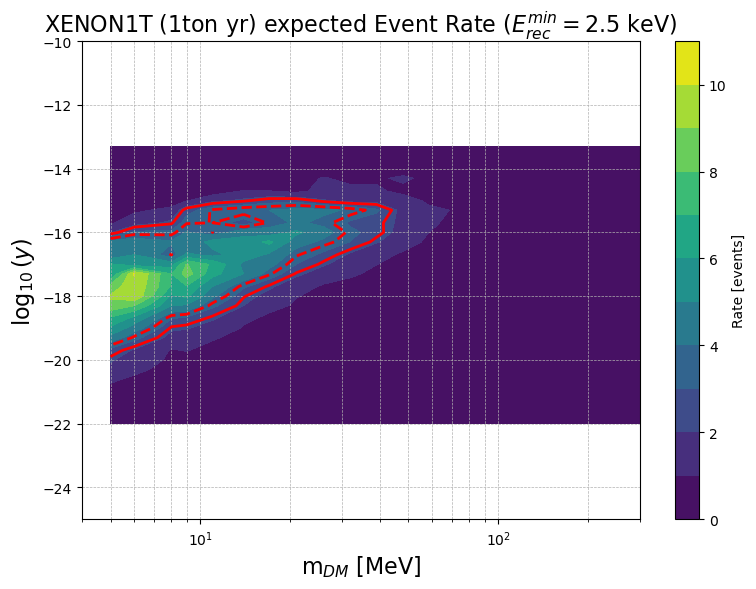

Solid contour   --> Expected events =  2.302
Dashed contour  --> Expected events =  3.472552951360137


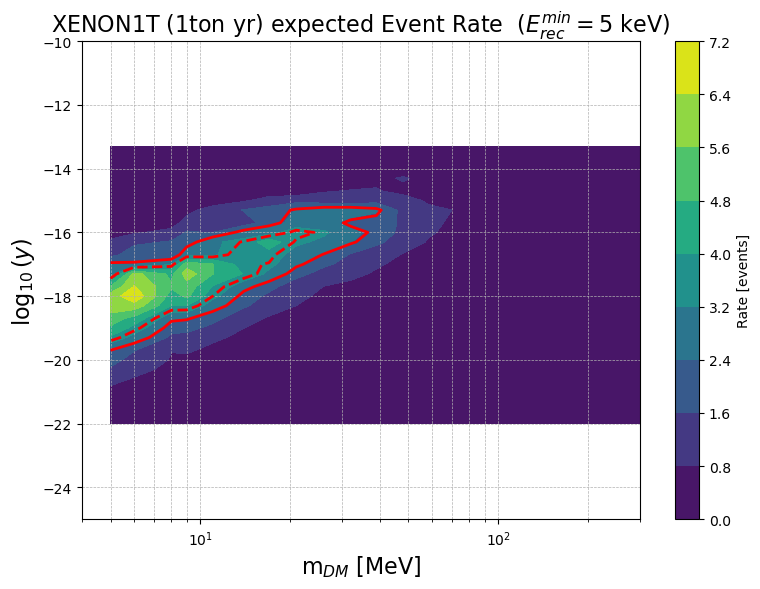

Solid contour   --> Expected events =  2.302
Dashed contour  --> Expected events =  3.1820295410319495


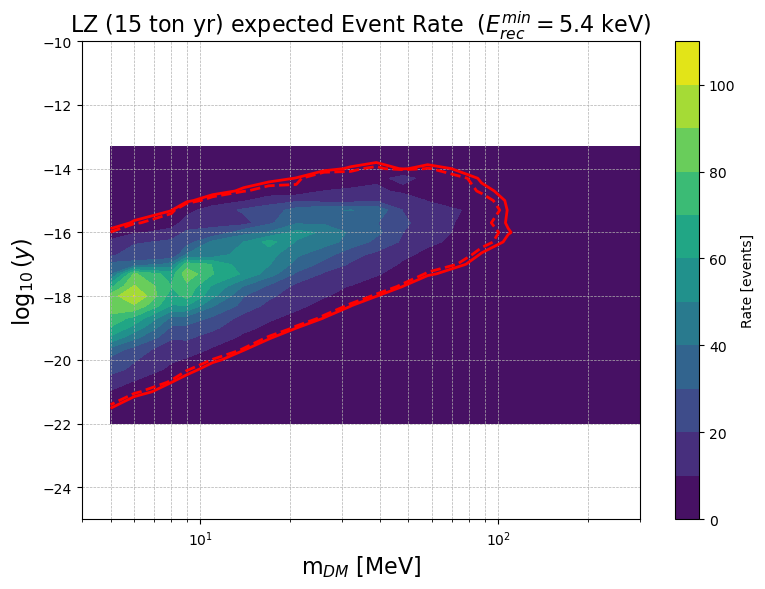

In [21]:
# Grid
M, Y = np.meshgrid(mass_vals_lowErec, log10y_vals_lowErec)

plt.figure(figsize=(8, 6))

cp = plt.contourf(M, Y, Nhits_grid_lowErec, levels=10, cmap='viridis')
plt.colorbar(cp, label='Rate [events]')

S_level = 2.302 # 90 CL if background free
print('Solid contour   --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_lowErec, levels=[S_level], colors='red', linewidths=2)
# plt.clabel(contour_line, fmt={S_level: 'S=1'}, fontsize=12)

S_level = XENON1T_signal_128
print('Dashed contour  --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_lowErec, levels=[S_level], colors='red', linewidths=2, linestyles='dashed')
# plt.clabel(contour_line, fmt={S_level: '90% C.L.'}, fontsize=8)

plt.xscale('log')
plt.xlim(4,300)
plt.ylim(-25,-10)
plt.xlabel("m$_{DM}$ [MeV]", fontsize=16)
plt.ylabel(r"$\log_{10}(y)$", fontsize=16)
plt.title("XENON1T (1ton yr) expected Event Rate ($E_{rec}^{min}=2.5$ keV)", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()





# Grid
M, Y = np.meshgrid(mass_vals, log10y_vals)

plt.figure(figsize=(8, 6))

cp = plt.contourf(M, Y, Nhits_grid, levels=10, cmap='viridis')
plt.colorbar(cp, label='Rate [events]')

S_level = 2.302 # 90 CL if background free
print('Solid contour   --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid, levels=[S_level], colors='red', linewidths=2)
# plt.clabel(contour_line, fmt={S_level: 'S=1'}, fontsize=12)

S_level = XENON1T_signal_128
print('Dashed contour  --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid, levels=[S_level], colors='red', linewidths=2, linestyles='dashed')
# plt.clabel(contour_line, fmt={S_level: '90% C.L.'}, fontsize=8)

plt.xscale('log')
plt.xlim(4,300)
plt.ylim(-25,-10)
plt.xlabel("m$_{DM}$ [MeV]", fontsize=16)
plt.ylabel(r"$\log_{10}(y)$", fontsize=16)
plt.title("XENON1T (1ton yr) expected Event Rate  ($E_{rec}^{min}=5$ keV)", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()





# Grid
M, Y = np.meshgrid(mass_vals_LZ15tonyr, log10y_vals_LZ15tonyr)

plt.figure(figsize=(8, 6))

cp = plt.contourf(M, Y, Nhits_grid_LZ15tonyr, levels=10, cmap='viridis')
plt.colorbar(cp, label='Rate [events]')

S_level = 2.302 # 90 CL if background free
print('Solid contour   --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_LZ15tonyr, levels=[S_level], colors='red', linewidths=2)
# plt.clabel(contour_line, fmt={S_level: 'S=1'}, fontsize=12)

S_level = LZ_signal_128
print('Dashed contour  --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_LZ15tonyr, levels=[S_level], colors='red', linewidths=2, linestyles='dashed')
# plt.clabel(contour_line, fmt={S_level: '90% C.L.'}, fontsize=8)

plt.xscale('log')
plt.xlim(4,300)
plt.ylim(-25,-10)
plt.xlabel("m$_{DM}$ [MeV]", fontsize=16)
plt.ylabel(r"$\log_{10}(y)$", fontsize=16)
plt.title("LZ (15 ton yr) expected Event Rate  ($E_{rec}^{min}=5.4$ keV)", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 4. Simulate SN in the galaxy

In [23]:
# Particles that take longer to reach Earth: minimum energy and maximum distance
print('max time (SN at r=-30 kpc, and very slow Particles: Ea~ma):')
print( 't = %.6e' % SNdist.tarrival(0.01*(1 + 0.01), 0.01, -30, 0, 0) , 's' ) # inputs: (Ea, ma, r, theta, z)
print( 't = %.6e' % SNdist.tarrival(1*(1 + 0.01), 1, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(10*(1 + 0.01), 10, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(100*(1 + 0.01), 100, -30, 0, 0) , 's' )

RE=8.23
zE=0.0208
# Particles that take longer to reach Earth: minimum energy and maximum distance
print()
print('min time (SN at r=RE+0.1 kpc, and very fast Particles: Ea>>ma)')
print( 't = %.6e' % SNdist.tarrival(150, 0.01, RE + 0.01, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 1, RE + 0.01, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 10, RE + 0.01, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 100, RE + 0.01, 0, zE) , 's' )

max time (SN at r=-30 kpc, and very slow Particles: Ea~ma):
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s

min time (SN at r=RE+0.1 kpc, and very fast Particles: Ea>>ma)
t = 1.029379e+09 s
t = 1.029402e+09 s
t = 1.031674e+09 s
t = 1.381057e+09 s


### Simulate

In [24]:
# number of universes:
num_ITER = 20

# SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = 0)
SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = -1e10)

# show the number of SN per universe
iteration = np.arange(1, num_ITER + 1)

print("Iteration | SN count")
for i, count in zip(iteration, SN_numbers):
    print(f"{i:>9} | {count:>8}")

Iteration | SN count
        1 |    14366
        2 |    14349
        3 |    14344
        4 |    14466
        5 |    14475
        6 |    14357
        7 |    14411
        8 |    14555
        9 |    14443
       10 |    14321
       11 |    14297
       12 |    14494
       13 |    14620
       14 |    14541
       15 |    14503
       16 |    14552
       17 |    14223
       18 |    14489
       19 |    14285
       20 |    14460


In [25]:
import pandas as pd

# Create DataFrame with a single simulation
df = pd.DataFrame(SN_sim[2], columns=['r [kpc]', '$\theta$', 'z [kpc]', 't [s]'])

# Show the first 10 rows
df.head(10)

,r [kpc],$\theta$,z [kpc],t [s]
0,3.633596,4.739676,-0.379220,-2.799916e+13
1,0.202749,0.202460,0.079171,-2.799898e+13
2,1.251226,5.475244,-0.320001,-2.799847e+13
3,1.684112,2.802380,-0.001709,-2.799619e+13
4,5.361244,4.173745,0.447933,-2.799555e+13
5,2.562183,1.889712,-0.326796,-2.799503e+13
6,2.177280,0.077653,0.087030,-2.799428e+13
7,1.914182,5.419587,0.137702,-2.799352e+13
8,8.099642,3.558192,0.138277,-2.799329e+13
9,3.172521,1.907403,-0.527523,-2.799244e+13


#### Plot the SN in the galactic coordinates

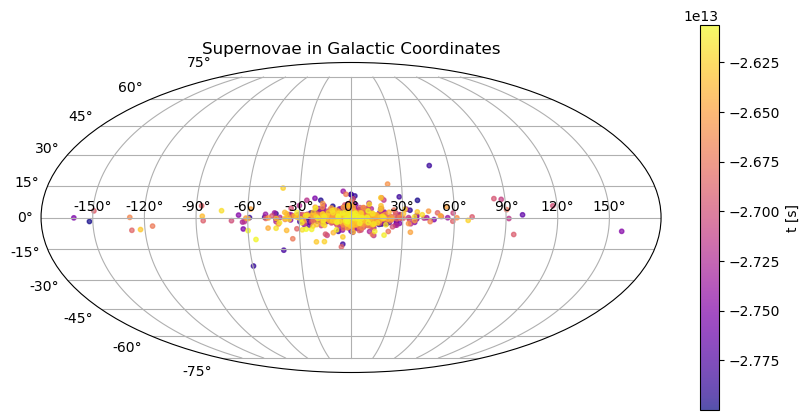

In [26]:
solar_system_position = [8.3, 0, 0]  # Solar System position, in kpc


# number off SN to plot
num_sn_examples = 1000

# take SN positions from df (r, theta, z) 'r [kpc]', '$\theta$', 'z [kpc]', 't [s]'
r = df['r [kpc]'].values[:num_sn_examples]
theta = df['$\theta$'].values[:num_sn_examples]
z = df['z [kpc]'].values[:num_sn_examples]

# Catesian
x = r * np.cos(theta)
y = r * np.sin(theta)

# Center in the Sun
x_helio = x - (solar_system_position[0] * np.cos(solar_system_position[1]) )
y_helio = y - (solar_system_position[0] * np.sin(solar_system_position[1]) )
z_helio = z - solar_system_position[2]

# now the GC is in (x_helio, y_helio) = (-r_sun, 0)
# I want it in (r_sun, 0)

# Mirror
x_new = -x_helio
y_new = y_helio
z_new = z_helio

# Galactic coordinates
l = np.arctan2(y_new, x_new)      # longitude [-pi, pi]
b = np.arctan2(z_new, np.sqrt(x_new**2 + y_new**2))  # latitude



# Plot in Mollweide projection (galactic coordinates)
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")
sc = ax.scatter(l, b, s=10, c=df['t [s]'][:num_sn_examples], cmap='plasma', alpha=0.7)



# Colorbar for SN times
cbar = plt.colorbar(sc, orientation="vertical", pad=0.05)
cbar.set_label("t [s]")

ax.set_title("Supernovae in Galactic Coordinates")
ax.grid(True)
# plt.savefig("figures/galaxycoordinates.pdf", bbox_inches='tight')
plt.show()

#### Compute the ALP flux from EACH SN in 1 simulation

In [27]:
# Example for 1 iteration

iit = 4 # choose a specific iteration
mchiTEST = mchiTEST2 # MeV



# Generate Erange for the selected iteration
Erange = SNdist.Eflux1sim(mchiTEST, ExpTIME, SN_sim[iit])



# Create DataFrame with a single simulation
Erange_df = pd.DataFrame(Erange, columns=['E1 [MeV]', 'E2 [MeV]', 'd(SN-Earth) [kpc]'])

# Show the first and the last 5 rows
pd.concat([Erange_df.head(5), Erange_df.tail(5)])

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])


,E1 [MeV],E2 [MeV],d(SN-Earth) [kpc]
0,26.012903,26.012903,8.565818
1,26.038045,26.038045,14.697055
2,26.048082,26.048082,16.516347
3,26.001553,26.001553,2.972263
4,26.015675,26.015675,9.438876
14470,NaN,NaN,5.415137
14471,NaN,NaN,13.330033
14472,NaN,NaN,4.878332
14473,NaN,NaN,4.916238
14474,NaN,NaN,8.488491


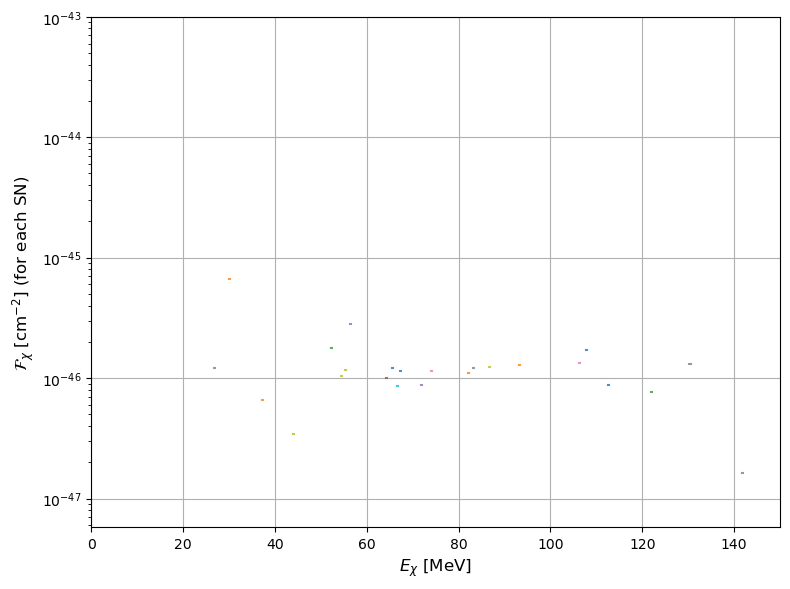

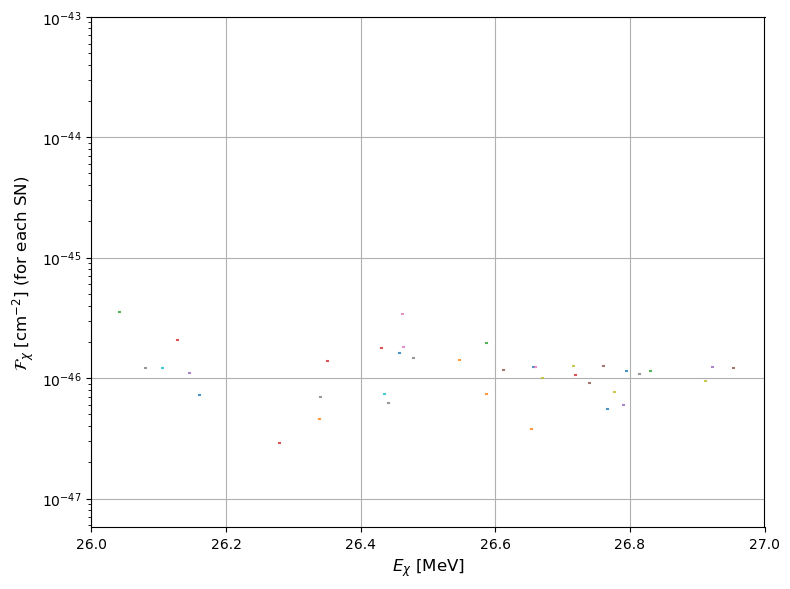

In [28]:
########
# PLOT #
# Example for 1 iteration and a fixed Mass #
########


# plot the contribution of each SN
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([0,150])
plt.yscale('log')
plt.xlabel(r"$E_{\chi}$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}_{\chi}$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# zoom
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([mchiTEST,mchiTEST+1])
plt.yscale('log')
plt.xlabel(r"$E_{\chi}$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}_{\chi}$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

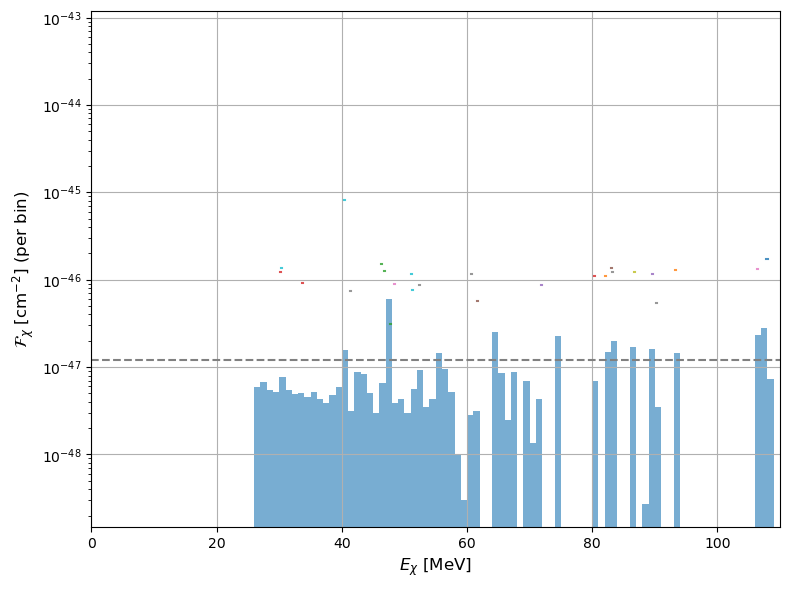

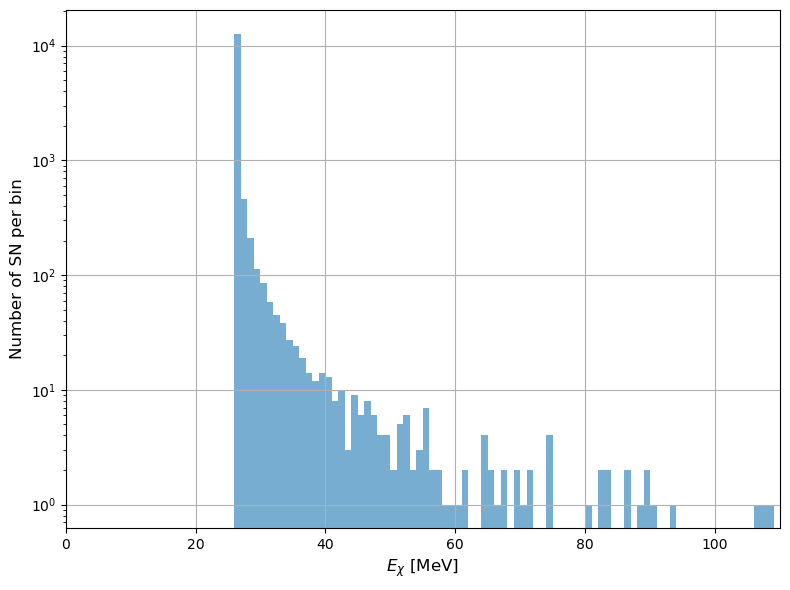

In [29]:
# plot the factor per bin (integrating each SN contribution)
# Ebins = np.linspace(15, 80, 66)
Ebins = np.arange(0, 110, 1)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

result_bins, SN_num_bins, SN_indices_bins = SNdist.factor1simBINS(Erange, Ebins)

plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)
        
plt.bar(bin_centers, result_bins, width=np.diff(Ebins), align='center', alpha=0.6)
plt.axhline(y=fluence_diff, linestyle='--', color='gray')

plt.xlim([0,110])
plt.yscale('log')
plt.xlabel(r"$E_{\chi}$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}_{\chi}$ [$\mathrm{cm^{-2}}$] (per bin)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# number of SN per bin (each SN can contribute to more than 1 bin)
plt.figure(figsize=(8, 6))

plt.bar(bin_centers, SN_num_bins, width=np.diff(Ebins), align='center', alpha=0.6)

plt.xlim([0,110])
plt.yscale('log')
plt.xlabel(r"$E_{\chi}$ [MeV]", fontsize=12)
plt.ylabel("Number of SN per bin", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------

For that you have class $\bf{DmAcross}$ defined in the imported module $\bf{DM4fermionINT}$

Inputs:
- Z: atomic number of the target material
- mA: mass number of the target material
- diffSNfactor: diffuse galactic SN factor [cm^{-2} s^{-1}] which we will set equal to 1
- profile: the SN profile class

In [30]:
# TARGET: Xenon
Z_Xe = 54
mA_Xe = 131.293*931.5 # MeV


DMfermion = DmAcross( Z=Z_Xe, mA=mA_Xe, diffSNfactor=1, profile=SN_prof )

### DM flux (with/without gravitational effects)

For that you have function $\bf{diffFlux}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p      : momentum of the incoming DM particle [MeV]
- rad    : radius [km]
- Nchi   : number flux of DM from a SN
        
Returns:
- dflux/dp  [m^-2 s^-1 MeV^-1]

--------------------------------

To take into account the gravitational effects you have function $\bf{Fp0}$ defined in the class $\bf{DmAcross}$

Inputs:
- mchi   : DM mass [MeV]
- p_inf  : momentum of the incoming DM particle when it has already scaped the SN gravitational potential [MeV]
- rad    : radius [km]
        
Returns:
- Momentoum at origen (p0) given p_inf, mchi and rad [MeV]

BP1:  m = 6 MeV, r = 55.7 km, Total number of particles produced in log(10)s = 1.68e+56
BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56
BP3:  m = 132 MeV, r = 15.2 km, Total number of particles produced in log(10)s = 5.07e+56


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)


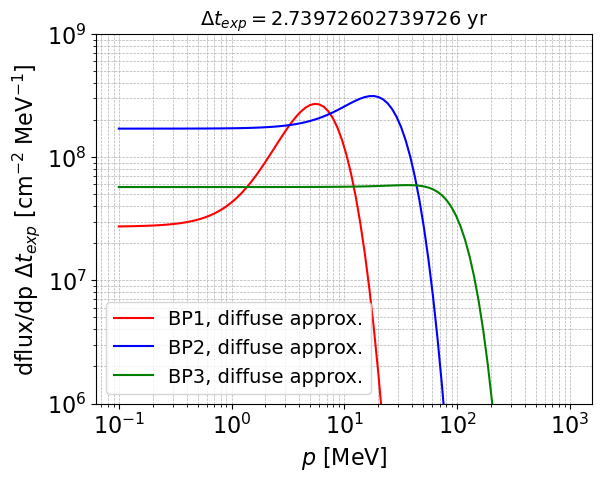

In [31]:
# LET's PLOT THE FLUX ON EARTH

mchiTEST1 = 6 # MeV
mchiTEST2 = 26 # MeV
mchiTEST3 = 132 # MeV

Nchi1 = 7.3e55 * np.log(10) # number flux of DM from the SN
Nchi2 = 3.3e56 * np.log(10) # number flux of DM from the SN
Nchi3 = 2.2e56 * np.log(10) # number flux of DM from the SN

rE1 = 55.7 # km
rE2 = 19.6 # km
rE3 = 15.2 # km

print(fr'BP1:  m = {mchiTEST1} MeV, r = {rE1} km, Total number of particles produced in log(10)s = {Nchi1:0.2e}')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')
print(fr'BP3:  m = {mchiTEST3} MeV, r = {rE3} km, Total number of particles produced in log(10)s = {Nchi3:0.2e}')



p_grid = np.logspace(-1, 3, 100)


diffFlux_plot_BP1 = [ diffSNfactor * ExpTIME * DMfermion.diffFlux(mchiTEST1, DMfermion.Fp0(pp, mchiTEST1, rad =rE1), rad=rE1, Nchi=Nchi1) for pp in p_grid ]
diffFlux_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(pp, mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2) for pp in p_grid ]
diffFlux_plot_BP3 = [ diffSNfactor * ExpTIME * DMfermion.diffFlux(mchiTEST3, DMfermion.Fp0(pp, mchiTEST3, rad =rE3), rad=rE3, Nchi=Nchi3) for pp in p_grid ]



plt.plot(p_grid, diffFlux_plot_BP1, '-', color='red', label=fr'BP1, diffuse approx.')
plt.plot(p_grid, diffFlux_plot_BP2, '-', color='blue', label=fr'BP2, diffuse approx.')
plt.plot(p_grid, diffFlux_plot_BP3, '-', color='green', label=fr'BP3, diffuse approx.')



plt.ylim(1e6,1e9)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$p$ [MeV]", fontsize=16)
plt.ylabel(r"dflux/dp $\Delta t_{exp}$ [cm$^{-2}$ MeV$^{-1}$]", fontsize=16)
plt.title(r'$\Delta t_{exp} = $' + str(ExpTIME/Units.seconds_in_year) + ' yr', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:280: RuntimeWarning: invalid value encountered in sqrt
  return Echi / np.sqrt(Echi**2 - mchi**2)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:277: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Echi**2 - mchi**2)


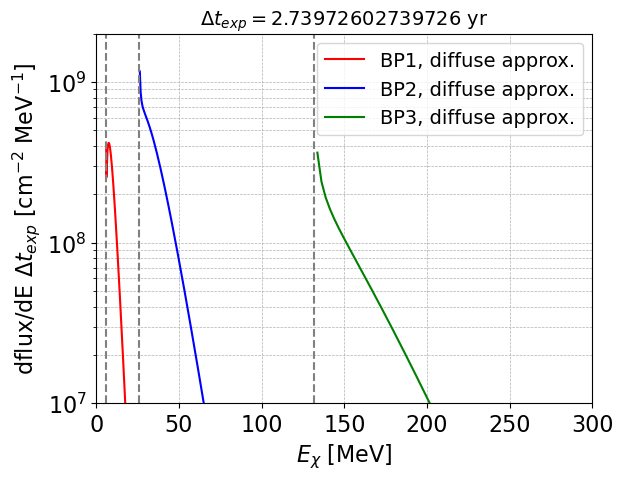

In [32]:
# AS A FUNCTION OF THE ENERGY

E_grid = np.logspace(-1, 3, 500)

diffFluxdE_plot_BP1 = [ diffSNfactor * ExpTIME * DMfermion.dE_dp(ee, mchiTEST1) * DMfermion.diffFlux(mchiTEST1, DMfermion.Fp0(DMfermion.E_to_p(ee, mchiTEST1), mchiTEST1, rad =rE1), rad=rE1, Nchi=Nchi1) for ee in E_grid ]
diffFluxdE_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dE_dp(ee, mchiTEST2) * DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(DMfermion.E_to_p(ee, mchiTEST2), mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2) for ee in E_grid ]
diffFluxdE_plot_BP3 = [ diffSNfactor * ExpTIME * DMfermion.dE_dp(ee, mchiTEST3) * DMfermion.diffFlux(mchiTEST3, DMfermion.Fp0(DMfermion.E_to_p(ee, mchiTEST3), mchiTEST3, rad =rE3), rad=rE3, Nchi=Nchi3) for ee in E_grid ]

plt.plot(E_grid, diffFluxdE_plot_BP1, '-', color='red', label=fr'BP1, diffuse approx.')
plt.plot(E_grid, diffFluxdE_plot_BP2, '-', color='blue', label=fr'BP2, diffuse approx.')
plt.plot(E_grid, diffFluxdE_plot_BP3, '-', color='green', label=fr'BP3, diffuse approx.')

plt.axvline(x=mchiTEST1, linestyle='--', color='gray')
plt.axvline(x=mchiTEST2, linestyle='--', color='gray')
plt.axvline(x=mchiTEST3, linestyle='--', color='gray')

plt.xlim(0,300)
plt.ylim(1e7,2e9)
# plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{\chi}$ [MeV]", fontsize=16)
plt.ylabel(r"dflux/dE $\Delta t_{exp}$ [cm$^{-2}$ MeV$^{-1}$]", fontsize=16)
plt.title(r'$\Delta t_{exp} = $' + str(ExpTIME/Units.seconds_in_year) + ' yr', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### FLUX OF ALL SN

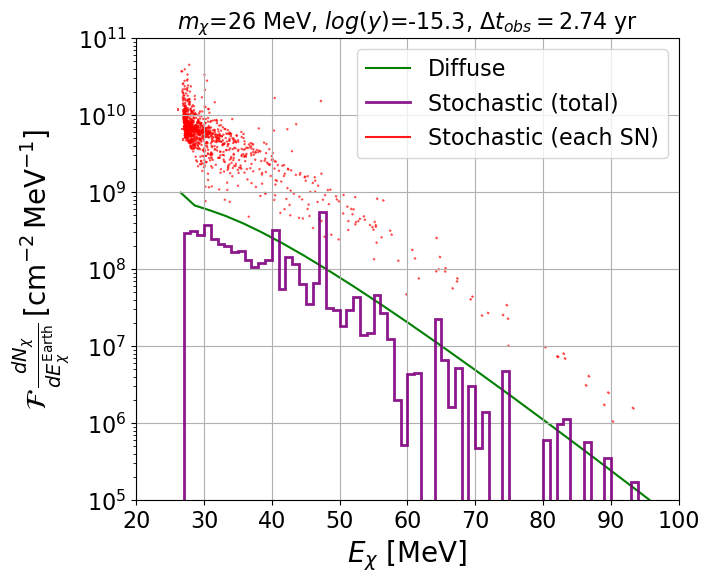

In [33]:
# Plot
plt.figure(figsize=(7,6))


# With diffuse approximation
E_grid = np.logspace(-1, 2.2, 100)

diffFlux_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dE_dp(ee, mchiTEST2) * DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(DMfermion.E_to_p(ee, mchiTEST2), mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2) for ee in E_grid ]

plt.plot(E_grid, diffFlux_plot_BP2, '-', color='green', label='Diffuse', zorder=1)



# SN simulation per BIN (integrating each SN contribution)
binwidth = 1
Ebins = np.arange(0, 100, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

result_bins = DMfermion.flux_1sim_BINS(Erange, Ebins, mchiTEST2, rE2, Nchi2)


# plt.bar(bin_centers, result_bins, width=np.diff(Ebins), align='center', alpha=0.6)
plt.stairs(result_bins, edges=Ebins, fill=False, color='purple', linewidth=2, alpha=0.9, label='Stochastic (total)', zorder=2) 

flux_max = 5e10
# each SN contribution individually
for E1, E2, dSN in Erange:
    if E2 > E1:
        Echi_plt = np.linspace(E1, E2, 5) # MeV
        flux = ( 1 / (4 * np.pi * (dSN * Units.kpctocm)**2) ) * DMfermion.dE_dp(Echi_plt, mchiTEST2) * DMfermion.diffFlux(mchiTEST2, DMfermion.Fp0(DMfermion.E_to_p(Echi_plt, mchiTEST2), mchiTEST2, rad =rE2), rad=rE2, Nchi=Nchi2)

        # if np.nanmax(flux) > flux_max:
        #     continue
        if np.percentile(flux, 50) > flux_max:
            continue
            
        plt.plot(Echi_plt, flux, color='red', alpha=0.7, zorder=0)

# dummy
plt.plot(np.array([-12,-10]), np.array([1,2]), color='red', alpha=0.9, label='Stochastic (each SN)')


plt.xlim(20,100)
plt.ylim(1e5,1e11)
# plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{\chi}$ [MeV]", fontsize=20)
plt.ylabel(r'$\mathcal{F}\,\frac{dN_{\chi}}{dE_{\chi}^{\rm Earth}}\,[\mathrm{cm^{-2}\,MeV^{-1}}]$', fontsize=20)
plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionflux.pdf", bbox_inches='tight', dpi=10)
plt.show()

### TARGET RECOIL SPECTRA

y =  5.011872336272715e-16

BP2:  m = 26 MeV, r = 19.6 km, Total number of particles produced in log(10)s = 7.60e+56


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:154: RuntimeWarning: overflow encountered in exp
  numerator = (p**3 / (np.exp(E_aux / T_r) + 1)) * (1./ E_aux)


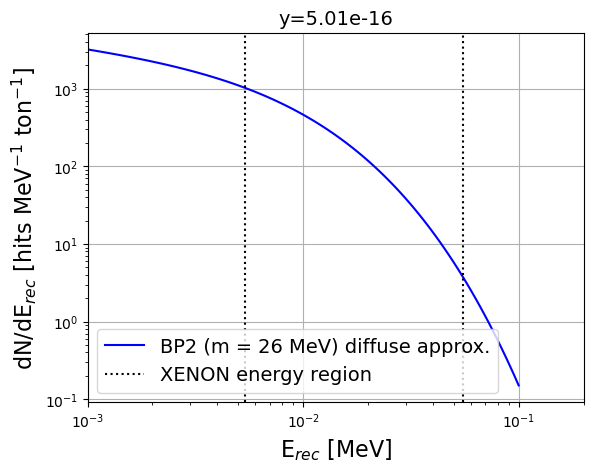

In [34]:
# LET's PLOT THE TARGET RECOIL SPECTRA

print('y = ', y_coupTEST)
print('')
print(fr'BP2:  m = {mchiTEST2} MeV, r = {rE2} km, Total number of particles produced in log(10)s = {Nchi2:0.2e}')


# With diffuse approximation
Erec_grid = np.logspace(-3, -1, 100)


dspectra_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]

# dspectra [MeV^-1 s^-1 ton^-1]
# diffSNfactor cm^-2
# ExpTIME s

# dspectra_plot_BP2 -> [MeV^-1 cm^-2 ton^-1]

plt.plot(Erec_grid, dspectra_plot_BP2, color='blue', label=fr'BP2 (m = {mchiTEST2} MeV) diffuse approx.')
plt.axvline(x=Erecmin_LZ, linestyle=':', color='black', label='XENON energy region')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3,2e-1)
# plt.ylim(1e-8,3e-4)
plt.xlabel("E$_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"dN/dE$_{rec}$ [hits MeV$^{-1}$ ton$^{-1}$]", fontsize=16)
plt.title(fr"y={y_coupTEST:0.2e}", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # Integrate dNgammadEgamma_1sim entre E1 y E2
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should 

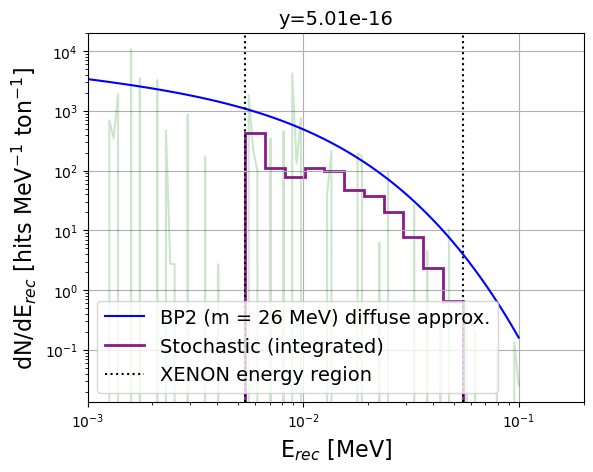

In [221]:
# SN simulation (integrating each SN contribution)
Erec_vals2 = np.logspace(-3, -1, 100)

dspec_vals_SIM = [ DMfermion.dspectra_1sim(E, mchiTEST2, y_coupTEST, rE2, Nchi2, Erange)
                  for E in Erec_vals2]


# SN simulation per BIN (integrating each SN contribution)
Erec_bins = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 5)

res_X = DMfermion.dspectra_1sim_BINS(Erec_bins,
                                 mchiTEST2, 
                              y_coupTEST, 
                              rE2, 
                              Nchi2, 
                              1000, 
                              Erange)


plt.plot(Erec_vals2, dspec_vals_SIM, color='green', alpha=0.2)
plt.plot(Erec_grid, dspectra_plot_BP2, color='blue', label=fr'BP2 (m = {mchiTEST2} MeV) diffuse approx.')
plt.stairs(res_X, edges=Erec_bins, fill=False, color='purple', linewidth=2, alpha=0.9, label='Stochastic (integrated)') 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black', label='XENON energy region')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3,2e-1)
# plt.ylim(1e-8,3e-4)
plt.xlabel("E$_{rec}$ [MeV]", fontsize=16)
plt.ylabel(r"dN/dE$_{rec}$ [hits MeV$^{-1}$ ton$^{-1}$]", fontsize=16)
plt.title(fr"y={y_coupTEST:0.2e}", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:360: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(lambda E: self.dspectra_1sim(E, mchi, y_coup, rad, Nchi, Erange), Ebin_min, Ebin_max, epsabs=1e-2, epsrel=1e-2)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:360: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(lambda E: self.dspectra_1sim(E, mchi, y_coup, rad, Nchi, Erange), Ebin_min, Ebin_max, epsabs=1e-2, epsr

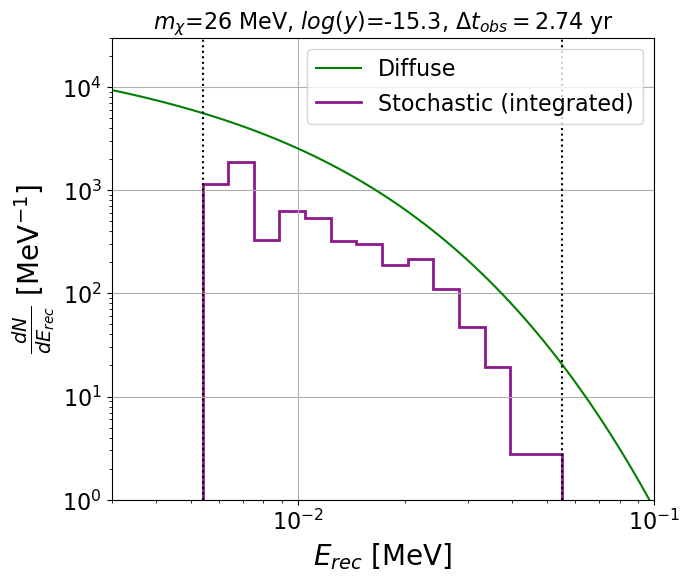

In [35]:
Mtarget = Mtarget_LZ # kg

# SN simulation per BIN (integrating each SN contribution)
Erec_bins = np.logspace(np.log10(Erecmin_LZ), np.log10(Erecmax_LZ), 15)

res_X = DMfermion.dspectra_1sim_BINS(Erec_bins,
                                 mchiTEST2, 
                              y_coupTEST, 
                              rE2, 
                              Nchi2, 
                              # 1000,
                              Mtarget_LZ, 
                              Erange)


# Plot
plt.figure(figsize=(7,6))

dspectra_plot_BP2_LZ = [ spec * (Mtarget_LZ/1000) for spec in dspectra_plot_BP2]

plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green', label='Diffuse')
plt.stairs(res_X, edges=Erec_bins, fill=False, color='purple', linewidth=2, alpha=0.9, label='Stochastic (integrated)') 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal.pdf", bbox_inches='tight')
plt.show()

#### Compute for all the simulations (takes a long time, already saved, load below)

/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:154: RuntimeWarning: overflow encountered in exp
  numerator = (p**3 / (np.exp(E_aux / T_r) + 1)) * (1./ E_aux)
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(lambda E: self.dspectra_1sim(E, mchi, y_coup, rad, Nchi, Erange), Ebin_min, Ebin_

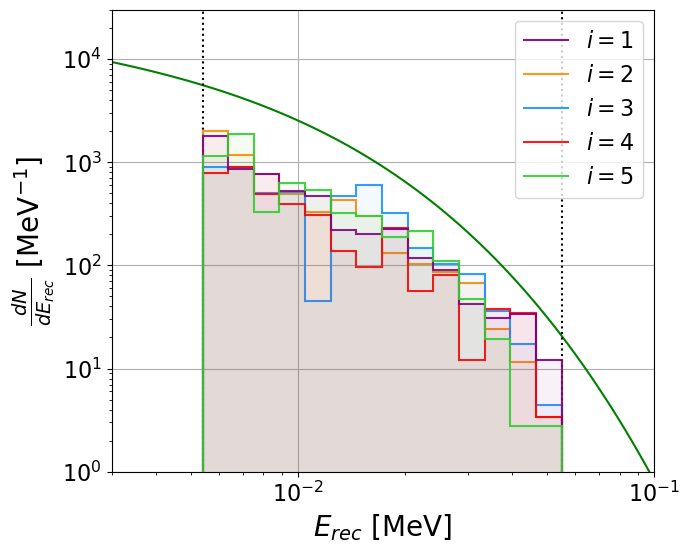

/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(lambda E: self.dspectra_1sim(E, mchi, y_coup, rad, Nchi, Erange), Ebin_min, Ebin_max, epsabs=1e-2, epsrel=1e-2)
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The maximum number of subdivisions (50) has been achieve

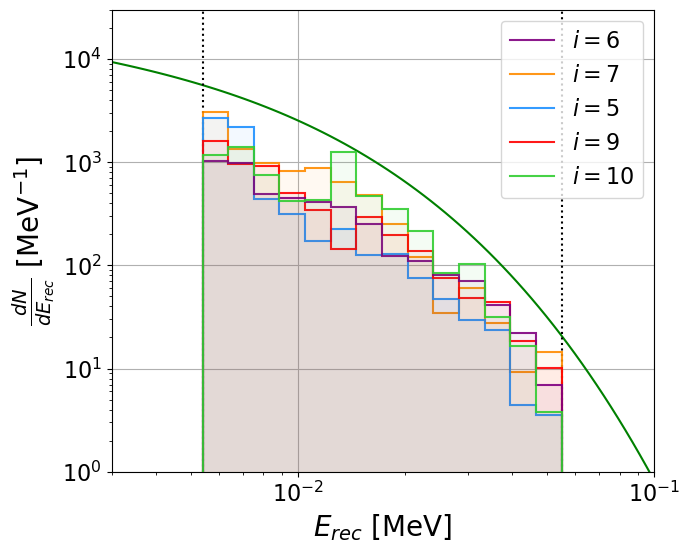

/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(lambda E: self.dspectra_1sim(E, mchi, y_coup, rad, Nchi, Erange), Ebin_min, Ebin_max, epsabs=1e-2, epsrel=1e-2)
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The maximum number of subdivisions (50) has been achieve

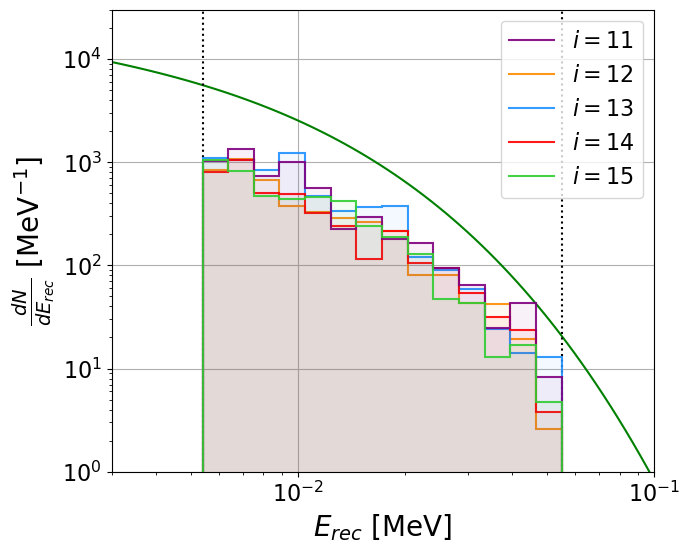

/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(lambda E: self.dspectra_1sim(E, mchi, y_coup, rad, Nchi, Erange), Ebin_min, Ebin_max, epsabs=1e-2, epsrel=1e-2)
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The maximum number of subdivisions (50) has been achieve

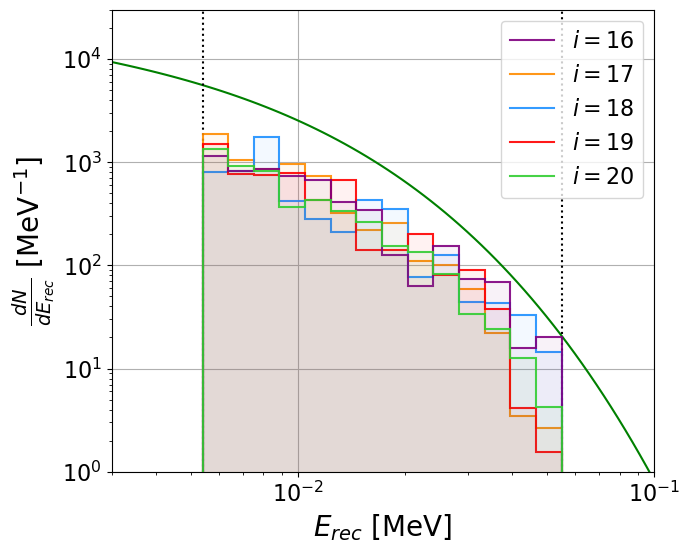

In [44]:
# With diffuse approximation
Erec_grid = np.logspace(-3, -1, 100)

dspectra_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]

dspectra_plot_BP2_LZ = [ spec * (Mtarget_LZ/1000) for spec in dspectra_plot_BP2]


# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 0
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_0 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_0, edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=1$', zorder=10)
plt.stairs(res_X_0, edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 1
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_1 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_1, edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=2$', zorder=5)
plt.stairs(res_X_1, edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 12
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_12 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_12, edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=3$', zorder=5)
plt.stairs(res_X_12, edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 3
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_3 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_3, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=4$', zorder=5)
plt.stairs(res_X_3, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 4
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_4 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_4, edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=5$', zorder=10)
plt.stairs(res_X_4, edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_5A.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 2
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_2 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_2, edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=6$', zorder=10)
plt.stairs(res_X_2, edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 5
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_5 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_5, edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=7$', zorder=5)
plt.stairs(res_X_5, edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 13
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_13 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_13, edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=5$', zorder=5)
plt.stairs(res_X_13, edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 7
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_7 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_7, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=9$', zorder=5)
plt.stairs(res_X_7, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 6
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_6 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_6, edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=10$', zorder=10)
plt.stairs(res_X_6, edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_5B.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 10
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_10 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_10, edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=11$', zorder=10)
plt.stairs(res_X_10, edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 16
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_16 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_16, edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=12$', zorder=5)
plt.stairs(res_X_16, edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 11
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_11 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_11, edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=13$', zorder=5)
plt.stairs(res_X_11, edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 8
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_8 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_8, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=14$', zorder=5)
plt.stairs(res_X_8, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 14
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_14 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_14, edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=15$', zorder=10)
plt.stairs(res_X_14, edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_5C.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 15
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_15 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_15, edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=16$', zorder=10)
plt.stairs(res_X_15, edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 9
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_9 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_9, edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=17$', zorder=5)
plt.stairs(res_X_9, edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 17
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_17 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_17, edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=18$', zorder=5)
plt.stairs(res_X_17, edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 18
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_18 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_18, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=19$', zorder=5)
plt.stairs(res_X_18, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 19
Erange = SNdist.Eflux1sim(mchiTEST2, ExpTIME, SN_sim[i_unis])
res_X_19 = DMfermion.dspectra_1sim_BINS(Erec_bins, mchiTEST2,y_coupTEST, rE2, Nchi2, Mtarget_LZ, Erange)
plt.stairs(res_X_19, edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=20$', zorder=10)
plt.stairs(res_X_19, edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_5D.pdf", bbox_inches='tight')
plt.show()






########
# SAVE #
########

res_list = [res_X_0, res_X_1, res_X_2, res_X_3, res_X_4,
            res_X_5, res_X_6, res_X_7, res_X_8, res_X_9,
            res_X_10, res_X_11, res_X_12, res_X_13, res_X_14,
            res_X_15, res_X_16, res_X_17, res_X_18, res_X_19]

filename = "data/eventrate_fermionicDM_sto_all.dat"

with open(filename, "w") as f:
    # Comments
    f.write("# Bin edges (E_rec) [same for all spectra]:\n")
    f.write("# Erec_bins = " + " ".join(f"{x:.6g}" for x in Erec_bins) + "\n")
    f.write("#\n")
    f.write("# Each row corresponds to res_X_i with i = 0,...,19\n")
    f.write("# Example plot:\n")
    f.write("# plt.stairs(res_X_18, edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9)\n")
    f.write("# plt.stairs(res_X_18, edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05)\n")
    f.write("#\n")

    # save one per line
    for arr in res_list:
        f.write(" ".join(f"{x:.8e}" for x in arr) + "\n")

#### LOAD

In [36]:
########
# LOAD #
########

data_eventrate = np.loadtxt("data/eventrate_fermionicDM_sto_all.dat")

res_X = {}
for i in range(data_eventrate.shape[0]):
    res_X[i] = data_eventrate[i]

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:154: RuntimeWarning: overflow encountered in exp
  numerator = (p**3 / (np.exp(E_aux / T_r) + 1)) * (1./ E_aux)


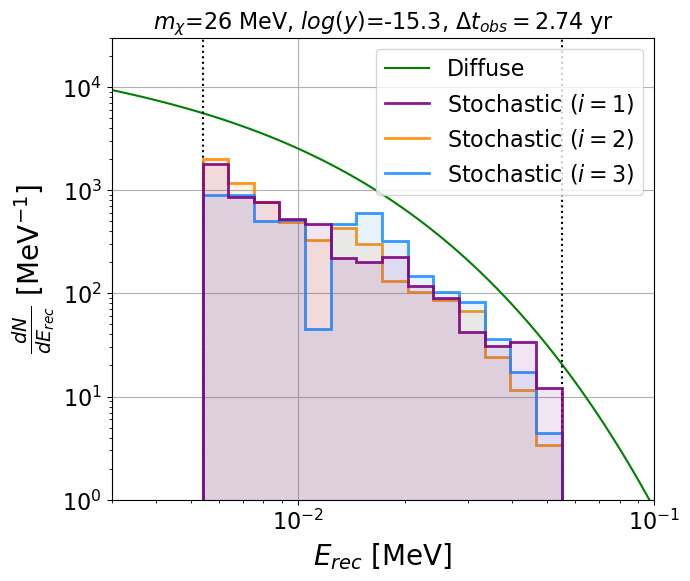

In [38]:
###################
# PLOT 3 EXAMPLES #
###################


# With diffuse approximation
Erec_grid = np.logspace(-3, -1, 100)

dspectra_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]

dspectra_plot_BP2_LZ = [ spec * (Mtarget_LZ/1000) for spec in dspectra_plot_BP2]


# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green', label='Diffuse')


# Generate Erange for the selected iteration
i_unis = 0
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=2, alpha=0.9, label=f'Stochastic ($i=1$)', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.1, zorder=10) 



# Generate Erange for the selected iteration
i_unis = 1
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=2, alpha=0.9, label=f'Stochastic ($i=2$)', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.1, zorder=5) 



# Generate Erange for the selected iteration
i_unis = 12
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=2, alpha=0.9, label=f'Stochastic ($i=3$)', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.1, zorder=5) 


plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("figures/fermionsignal_triple.pdf", bbox_inches='tight')
plt.show()

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:158: RuntimeWarning: overflow encountered in exp
  return (En**2 - mchi**2) / (np.exp(En / T_r) + 1)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/DM4fermionINT.py:154: RuntimeWarning: overflow encountered in exp
  numerator = (p**3 / (np.exp(E_aux / T_r) + 1)) * (1./ E_aux)


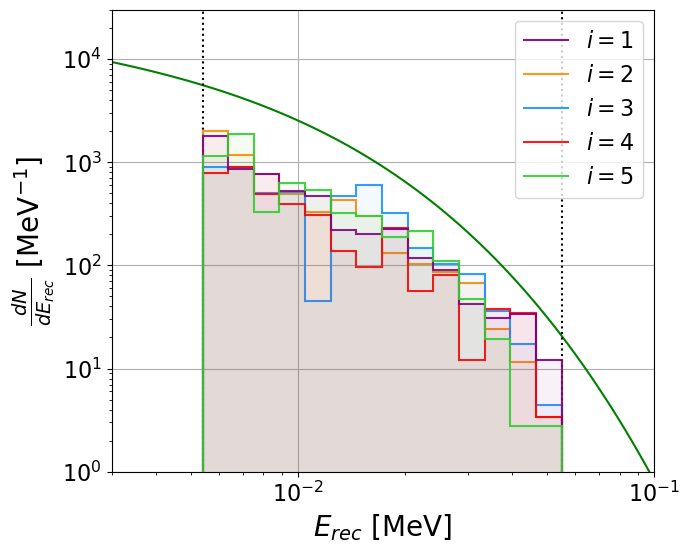

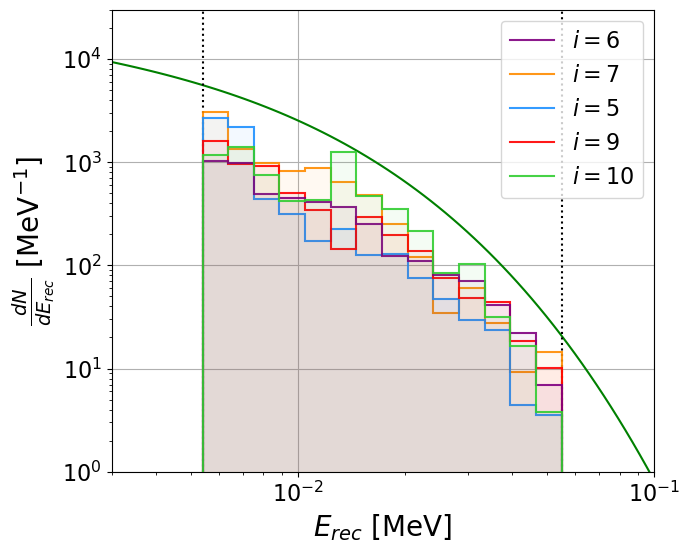

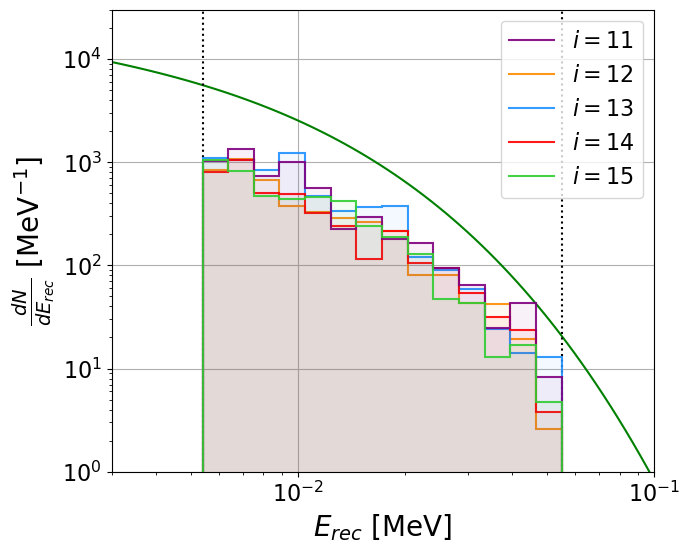

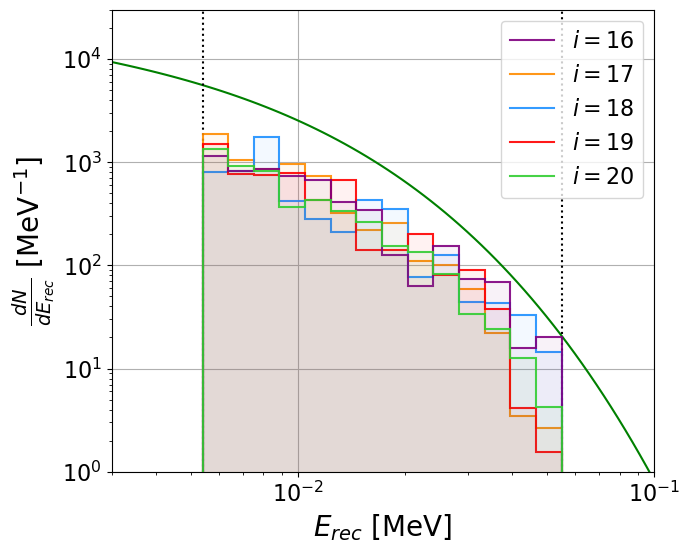

In [39]:
############
# PLOT ALL #
############


# With diffuse approximation
Erec_grid = np.logspace(-3, -1, 100)

dspectra_plot_BP2 = [ diffSNfactor * ExpTIME * DMfermion.dspectra(mchiTEST2, ee, y_coupTEST, rad=rE2, Nchi=Nchi2) for ee in Erec_grid ]

dspectra_plot_BP2_LZ = [ spec * (Mtarget_LZ/1000) for spec in dspectra_plot_BP2]


# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 0
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=1$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 1
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=2$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 12
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=3$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 3
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=4$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 4
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=5$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
# plt.ylim(1e2,2.5e3)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionsignal_5A.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 2
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=6$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 5
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=7$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 13
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=5$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 7
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=9$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 6
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=10$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionsignal_5B.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 10
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=11$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 16
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=12$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 11
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=13$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 8
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=14$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 14
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=15$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionsignal_5C.pdf", bbox_inches='tight')
plt.show()





# Plot
plt.figure(figsize=(7,6))
plt.plot(Erec_grid, dspectra_plot_BP2_LZ, color='green')

i_unis = 15
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='purple', linewidth=1.5, alpha=0.9, label=f'$i=16$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

i_unis = 9
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='darkorange', linewidth=1.5, alpha=0.9, label=f'$i=17$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

i_unis = 17
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, alpha=0.9, label=f'$i=18$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

i_unis = 18
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='red', linewidth=1.5, alpha=0.9, label=f'$i=19$', zorder=5)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

i_unis = 19
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=False, edgecolor='limegreen', linewidth=1.5, alpha=0.9, label=f'$i=20$', zorder=10)
plt.stairs(res_X[i_unis], edges=Erec_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10) 

plt.axvline(x=Erecmin_LZ, linestyle=':', color='black')
plt.axvline(x=Erecmax_LZ, linestyle=':', color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3,1e-1)
plt.ylim(1e0,3e4)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel("$E_{rec}$ [MeV]", fontsize=20)
plt.ylabel(r"$\frac{dN}{dE_{rec}}$ [MeV$^{-1}$]", fontsize=20)
# plt.title(fr'$m_{{\chi}}$={mchiTEST2} MeV, $log(y)$={np.log10(y_coupTEST)}, $\Delta t_{{obs}}=2.74$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/fermionsignal_5D.pdf", bbox_inches='tight')
plt.show()

## NUMBER OF EVENTS IN THE DETECTOR

#### TAKES TIME, already saved

Integrate the binned spectra * bin width

In [251]:
# FOR LZ, with 15 ton yr exposure

Mtarget = Mtarget_LZ # kg
texp = texp_LZ # years

Emin = Erecmin_LZ # MeV
Emax = Erecmax_LZ # MeV

ExpTIME = texp_LZ * Units.seconds_in_year  # Time window of the experiment, in seconds


Erec_bins = np.array([Emin, Emax]) # a single bin


# grid
M, Y = np.meshgrid(massesIT, log10yIT)

# Initialize the results
Nhits = np.zeros_like(M)  # M.shape



# loop in universes
for iit in range(20):

    print('Working on universe: ', iit)

    

    # grid and save
    with open("data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe" + str(iit) + ".dat", "w") as f:
        # header
        f.write("# log10(y)    mass[MeV]    Nhits\n")
        
        for m_it in range(len(massesIT)):

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(massesIT[m_it], texp * Units.seconds_in_year, SN_sim[iit])
            
            for y_it in range(len(log10yIT)):
            
                m_ev = massesIT[m_it]
                y_ev = 10**(log10yIT[y_it])
                r_ev = energysphereIT[y_it][m_it]
    
                # If r_ev is "Bulk", skip and set result to 0
                if isinstance(r_ev, str) and r_ev.lower() == "bulk":
                    Nhits[y_it, m_it] = np.array([0])
                    f.write(f"{log10yIT[y_it]:.6e}  {m_ev:.6e}  0.0\n")
                    f.flush()
                    continue
    
                N_ev = numfluxIT[y_it][m_it] * np.log(10)
    
                result = DMfermion.dspectra_1sim_BINS(Erec_bins,
                                                      m_ev,
                                                      y_ev, 
                                                      r_ev, 
                                                      N_ev,
                                                      Mtarget, 
                                                      Erange)
                

                # considering only 1 bin, multiply by its length to obtain the total number of events (integrate in E)
                Nhits[y_it, m_it] = result[0] * (Emax - Emin) 
    
                f.write(f"{log10yIT[y_it]}  {m_ev}  {result[0] * (Emax - Emin) :0.6e}\n")
                f.flush()

    print('-----------')

print('DONE')

Working on universe:  0


/tmp/ipykernel_6280/3020959146.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nhits[y_it, m_it] = np.array([0])
/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:376: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(lambda E: self.dspectra_1sim(E, mchi, y_coup, rad, Nchi, Erange), Ebin_min, Ebin_max, epsabs=1e-2, epsrel=1e-2)


-----------
Working on universe:  1
-----------
Working on universe:  2


/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/DM4fermionINT.py:154: RuntimeWarning: overflow encountered in exp
  numerator = (p**3 / (np.exp(E_aux / T_r) + 1)) * (1./ E_aux)


-----------
Working on universe:  3
-----------
Working on universe:  4
-----------
Working on universe:  5
-----------
Working on universe:  6
-----------
Working on universe:  7
-----------
Working on universe:  8
-----------
Working on universe:  9
-----------
Working on universe:  10
-----------
Working on universe:  11
-----------
Working on universe:  12
-----------
Working on universe:  13
-----------
Working on universe:  14
-----------
Working on universe:  15
-----------
Working on universe:  16
-----------
Working on universe:  17
-----------
Working on universe:  18
-----------
Working on universe:  19
-----------
DONE


#### LOAD

Let's see the result for just 1 universe as an example

SIMULATION SELECTED:  10
Solid contour   --> Expected events =  2.302
Dashed contour  --> Expected events =  3.1820295410319495


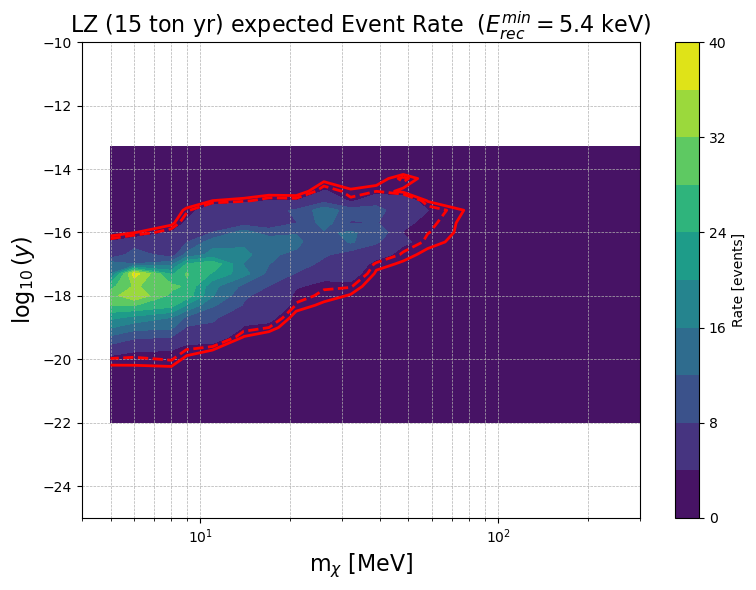

DIFFUSE APPROXIMATION:
Solid contour   --> Expected events =  2.302
Dashed contour  --> Expected events =  3.1820295410319495


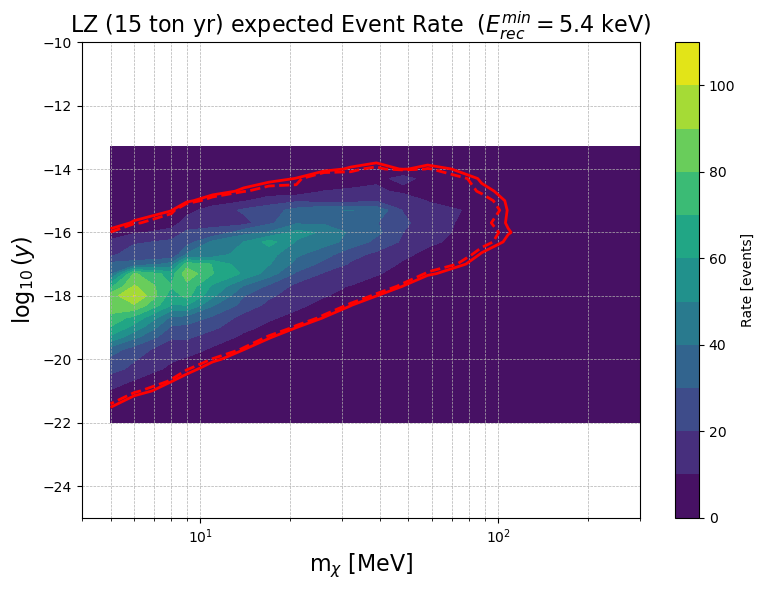

In [40]:
############
# 1 SIMULATION #
############

# LOAD
# choose the universe
uni = 10
print('SIMULATION SELECTED: ', uni)

data = np.loadtxt("data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe" + str(uni) + ".dat", comments="#")

log10y_vals_all = data[:, 0]
mass_vals_all   = data[:, 1]
Nhits_all       = data[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all))
n_m = len(np.unique(mass_vals_all))


log10y_vals_sim1 = log10y_vals_all[:n_y]  # each row has n_y masses
mass_vals_sim1   = mass_vals_all[::n_y]     # the 1st row

# Reshape
Nhits_grid_sim1 = Nhits_all.reshape((n_m, n_y)).T



# Grid
M, Y = np.meshgrid(mass_vals_sim1, log10y_vals_sim1)

plt.figure(figsize=(8, 6))

cp = plt.contourf(M, Y, Nhits_grid_sim1, levels=10, cmap='viridis')
plt.colorbar(cp, label='Rate [events]')

S_level = 2.302 # 90 CL if background free
print('Solid contour   --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_sim1, levels=[S_level], colors='red', linewidths=2)
# plt.clabel(contour_line, fmt={S_level: 'S=1'}, fontsize=12)

S_level = LZ_signal_128
print('Dashed contour  --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_sim1, levels=[S_level], colors='red', linewidths=2, linestyles='dashed')
# plt.clabel(contour_line, fmt={S_level: '90% C.L.'}, fontsize=8)

plt.xscale('log')
plt.xlim(4,300)
plt.ylim(-25,-10)
plt.xlabel("m$_{\chi}$ [MeV]", fontsize=16)
plt.ylabel(r"$\log_{10}(y)$", fontsize=16)
plt.title("LZ (15 ton yr) expected Event Rate  ($E_{rec}^{min}=5.4$ keV)", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()




################
# LZ 15 ton yr #
################

# LOAD
data = np.loadtxt("data/Nhits_grid_LZ15tonyr.dat", comments="#")

print('DIFFUSE APPROXIMATION:')

log10y_vals_all = data[:, 0]
mass_vals_all   = data[:, 1]
Nhits_all       = data[:, 2]

# lengths
n_y = len(np.unique(log10y_vals_all))
n_m = len(np.unique(mass_vals_all))


log10y_vals_LZ15tonyr = log10y_vals_all[::n_m]  # each row has n_m masses
mass_vals_LZ15tonyr   = mass_vals_all[:n_m]     # the 1st row

# Reshape
Nhits_grid_LZ15tonyr = Nhits_all.reshape((n_y, n_m))




# Grid
M, Y = np.meshgrid(mass_vals_LZ15tonyr, log10y_vals_LZ15tonyr)

plt.figure(figsize=(8, 6))

cp = plt.contourf(M, Y, Nhits_grid_LZ15tonyr, levels=10, cmap='viridis')
plt.colorbar(cp, label='Rate [events]')

S_level = 2.302 # 90 CL if background free
print('Solid contour   --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_LZ15tonyr, levels=[S_level], colors='red', linewidths=2)
# plt.clabel(contour_line, fmt={S_level: 'S=1'}, fontsize=12)

S_level = LZ_signal_128
print('Dashed contour  --> Expected events = ', S_level)
contour_line = plt.contour(M, Y, Nhits_grid_LZ15tonyr, levels=[S_level], colors='red', linewidths=2, linestyles='dashed')
# plt.clabel(contour_line, fmt={S_level: '90% C.L.'}, fontsize=8)

plt.xscale('log')
plt.xlim(4,300)
plt.ylim(-25,-10)
plt.xlabel("m$_{\chi}$ [MeV]", fontsize=16)
plt.ylabel(r"$\log_{10}(y)$", fontsize=16)
plt.title("LZ (15 ton yr) expected Event Rate  ($E_{rec}^{min}=5.4$ keV)", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### LOAD ALL THE SIMULATIONS

In [41]:
# FUNCTION TO LOAD ALL THE CONSTRAINTS

def load_and_prepare_grid(filename, y_scale=1):
    data = np.loadtxt(filename)
    # y_scale needed because    g_ap = C_ap * g_a
    X, Y, Z = data[:, 0], data[:, 1] * y_scale, data[:, 2]

    x_unique = np.unique(X)
    y_unique = np.unique(Y)
    X_grid, Y_grid = np.meshgrid(x_unique, y_unique)
    Z_grid = np.zeros_like(X_grid)

    for i in range(len(X)):
        x_idx = np.where(x_unique == X[i])[0][0]
        y_idx = np.where(y_unique == Y[i])[0][0]
        Z_grid[y_idx, x_idx] = Z[i]

    return X_grid, Y_grid, Z_grid

# Files
files = {"LZ15diff": "data/Nhits_grid_LZ15tonyr.dat",
         "LZ15sim0": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe0.dat",
         "LZ15sim1": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe1.dat",
         "LZ15sim2": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe2.dat",
         "LZ15sim3": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe3.dat",
         "LZ15sim4": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe4.dat",
         "LZ15sim5": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe5.dat",
         "LZ15sim6": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe6.dat",
         "LZ15sim7": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe7.dat",
         "LZ15sim8": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe8.dat",
         "LZ15sim9": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe9.dat",
         "LZ15sim10": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe10.dat",
         "LZ15sim11": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe11.dat",
         "LZ15sim12": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe12.dat",
         "LZ15sim13": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe13.dat",
         "LZ15sim14": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe14.dat",
         "LZ15sim15": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe15.dat",
         "LZ15sim16": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe16.dat",
         "LZ15sim17": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe17.dat",
         "LZ15sim18": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe18.dat",
         "LZ15sim19": "data/fermionicDM-sims/Nhits_grid_LZ15tonyr_sim_universe19.dat",
         
}

# Dictionary to save the results
grids = {}

for label, filepath in files.items():
    Xg, Yg, Zg = load_and_prepare_grid(filepath)
    grids[label] = {"X": Xg, "Y": Yg, "Z": Zg}

In [42]:
# COMPUTE THE MEAN AND 1 STANDARD DEVIATION --- MEDIAN AND 16-84 PERCENTILES

S_stack_all = np.stack([grids[f"LZ15sim{i}"]["Z"] for i in range(0,20)])

S_mean = S_stack_all.mean(axis=0)
S_std = S_stack_all.std(axis=0)

S_median = np.median(S_stack_all, axis=0)
S_p16, S_p84 = np.percentile(S_stack_all, [16, 84], axis=0)

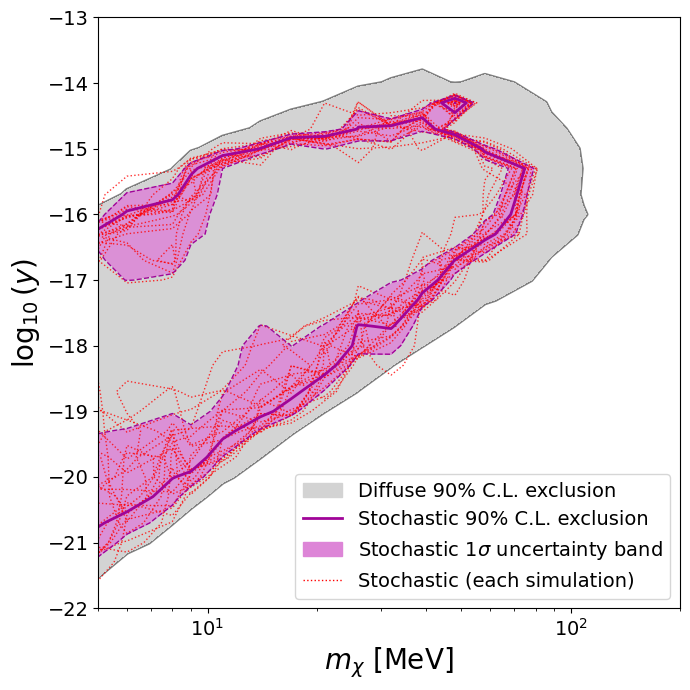

In [43]:
# S value to plot contour
S_level = 2.302 # 90 CL if background free


# colors
colorfill = 'xkcd:lavender pink'
colorline = 'xkcd:barney purple'
colortext = 'black'


# PLOT
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)


# LZ diffuse approximation
ax.contour(grids["LZ15diff"]["Y"], grids["LZ15diff"]["X"], grids["LZ15diff"]["Z"], 
                     levels=[S_level], colors="gray", linewidths=3, linestyles='-', zorder=0)

ax.contourf(grids["LZ15diff"]["Y"], grids["LZ15diff"]["X"], grids["LZ15diff"]["Z"], 
                        levels=[S_level, grids["LZ15diff"]["Z"].max()], colors=["lightgray"], alpha=1, zorder=0)


# LZ universe 
ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_mean, 
           levels=[S_level], colors=colorline, linewidths=2, linestyles='-')

ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_mean + S_std, 
           levels=[S_level], colors=colorline, linewidths=1, linestyles='--')

ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], np.maximum(0, S_mean - np.minimum(8, S_std)), # for looks
           levels=[S_level], colors=colorline, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_mean + S_std, 
            levels=[S_level, S_mean.max()], colors=[colorfill], alpha=0.85)

# S_level + 1σ
ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], np.maximum(0, S_mean - np.minimum(8, S_std)), # for looks
            levels=[S_level, S_mean.max()], colors=['lightgray'], alpha=1.0)


coloruni = 'red'
for uni in range(0,20):
    ax.contour(grids["LZ15sim"+str(uni)]["Y"], grids["LZ15sim"+str(uni)]["X"], grids["LZ15sim"+str(uni)]["Z"], levels=[S_level], colors=coloruni, linewidths=1, linestyles=':', alpha=0.8, zorder=1)



plt.xscale('log')
plt.xlim(5,200)
plt.ylim(-22,-13)
plt.xlabel("$m_{\chi}$ [MeV]", fontsize=20)
plt.ylabel(r"$\log_{10}(y)$", fontsize=20)
# plt.title("LZ (15 ton yr) SIM 1 expected Event Rate  ($E_{rec}^{min}=5$ keV)", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Legends
diffuse_patch = mpatches.Patch(color='lightgray', label='Diffuse 90% C.L. exclusion')
sto_line, = ax.plot(np.array([1,2]), np.array([1,2]), color=colorline, label='Stochastic 90% C.L. exclusion', linewidth=2) 
sto_band_patch = mpatches.Patch(color=colorfill, label='Stochastic 1$\sigma$ uncertainty band')
sto_line_sim, = ax.plot(np.array([1,2]), np.array([1,2]), color='red', linestyle=':', label='Stochastic (each simulation)', linewidth=1) 

ax.legend(handles=[diffuse_patch, sto_line, sto_band_patch, sto_line_sim], fontsize=14, loc='lower right')

plt.savefig("figures/boundsLZ15_y_vs_mDM.pdf", bbox_inches='tight')
plt.show()

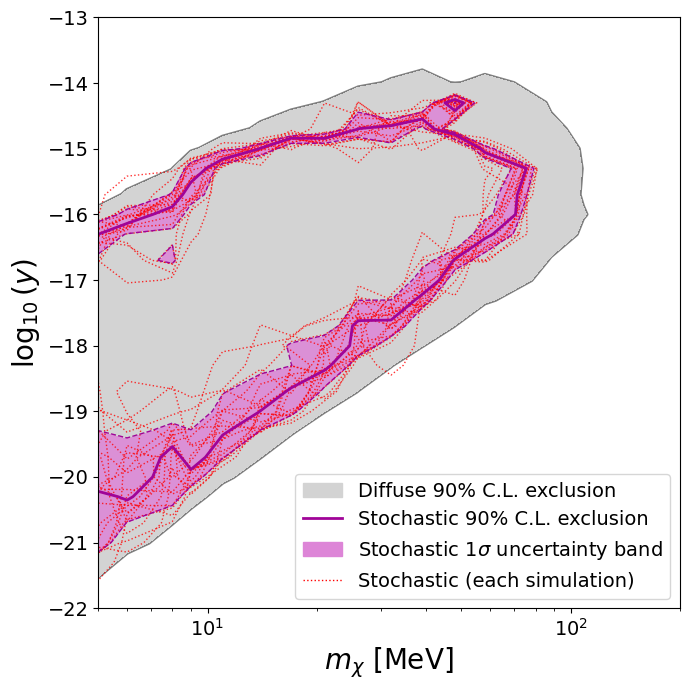

In [44]:
# S value to plot contour
S_level = 2.302 # 90 CL if background free


# colors
colorfill = 'xkcd:lavender pink'
colorline = 'xkcd:barney purple'
colortext = 'black'

colorfill2 = 'orange'
colorline2 = 'darkorange'

# PLOT
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)


# LZ diffuse approximation
ax.contour(grids["LZ15diff"]["Y"], grids["LZ15diff"]["X"], grids["LZ15diff"]["Z"], 
                     levels=[S_level], colors="gray", linewidths=3, linestyles='-', zorder=0)

ax.contourf(grids["LZ15diff"]["Y"], grids["LZ15diff"]["X"], grids["LZ15diff"]["Z"], 
                        levels=[S_level, grids["LZ15diff"]["Z"].max()], colors=["lightgray"], alpha=1, zorder=0)


# LZ universe: median and percentiles
ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_median, 
           levels=[S_level], colors=colorline, linewidths=2, linestyles='-')

ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_p84, 
           levels=[S_level], colors=colorline, linewidths=1, linestyles='--')

ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_p16,
           levels=[S_level], colors=colorline, linewidths=1, linestyles='--')


# S_level - 1σ
ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_p84, 
            levels=[S_level, S_median.max()], colors=[colorfill], alpha=0.85)

# S_level + 1σ
ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_p16,
            levels=[S_level, S_median.max()], colors=['lightgray'], alpha=1.0)



# # LZ universe: mean and std
# ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_mean, 
#            levels=[S_level], colors=colorline2, linewidths=2, linestyles='-')

# ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_mean + S_std, 
#            levels=[S_level], colors=colorline2, linewidths=1, linestyles='-')

# ax.contour(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], np.maximum(0, S_mean - np.minimum(8, S_std)), # for looks
#            levels=[S_level], colors=colorline2, linewidths=1, linestyles='-')


# # S_level - 1σ
# ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], S_mean + S_std, 
#             levels=[S_level, S_mean.max()], colors=[colorfill2], alpha=0.2)

# # S_level + 1σ
# ax.contourf(grids["LZ15sim10"]["Y"], grids["LZ15sim10"]["X"], np.maximum(0, S_mean - np.minimum(8, S_std)), # for looks
#             levels=[S_level, S_mean.max()], colors=['lightgray'], alpha=1.0)


coloruni = 'red'
for uni in range(0,20):
    ax.contour(grids["LZ15sim"+str(uni)]["Y"], grids["LZ15sim"+str(uni)]["X"], grids["LZ15sim"+str(uni)]["Z"], levels=[S_level], colors=coloruni, linewidths=1, linestyles=':', alpha=0.8, zorder=1)



plt.xscale('log')
plt.xlim(5,200)
plt.ylim(-22,-13)
plt.xlabel("$m_{\chi}$ [MeV]", fontsize=20)
plt.ylabel(r"$\log_{10}(y)$", fontsize=20)
# plt.title("LZ (15 ton yr) SIM 1 expected Event Rate  ($E_{rec}^{min}=5$ keV)", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Legends
diffuse_patch = mpatches.Patch(color='lightgray', label='Diffuse 90% C.L. exclusion')
sto_line, = ax.plot(np.array([1,2]), np.array([1,2]), color=colorline, label='Stochastic 90% C.L. exclusion', linewidth=2) 
sto_band_patch = mpatches.Patch(color=colorfill, label='Stochastic 1$\sigma$ uncertainty band')
sto_line_sim, = ax.plot(np.array([1,2]), np.array([1,2]), color='red', linestyle=':', label='Stochastic (each simulation)', linewidth=1) 

ax.legend(handles=[diffuse_patch, sto_line, sto_band_patch, sto_line_sim], fontsize=14, loc='lower right')

plt.savefig("figures/boundsLZ15_y_vs_mDM_median.pdf", bbox_inches='tight')
plt.show()